In [27]:
cd ../../

/Users/in-divye.singh/Documents


In [4]:
from notebooks.utils import *

In [5]:
import biovec
import numpy as np
import pandas as pd
from itertools import chain

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv("data/raw/105_feature_ha_avp_ic50.csv")

In [10]:
df['lessthan5'] = df['MIC'].apply(lambda mic: 1 if mic <= 5 else 0)

In [17]:
seq_len = df['Seq'].map(lambda s: len(s))

In [18]:
prop_cols = df.columns[2:]

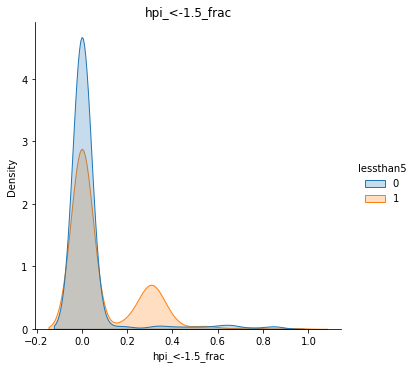

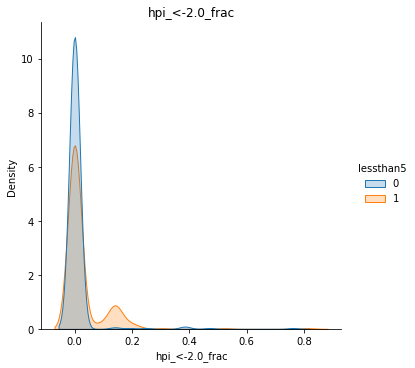

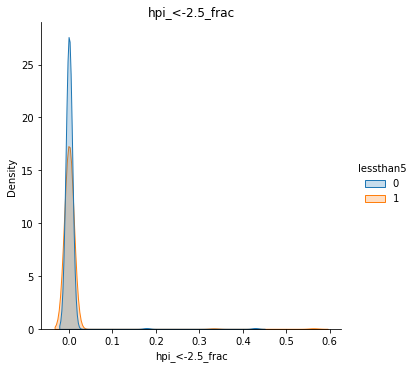

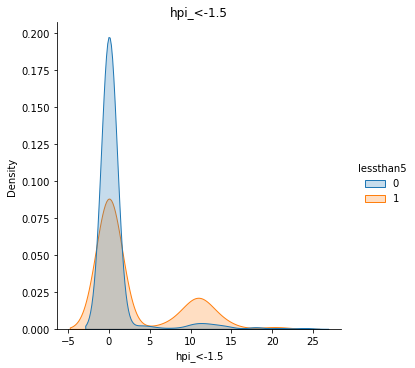

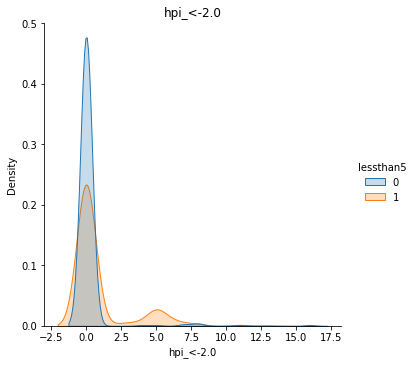

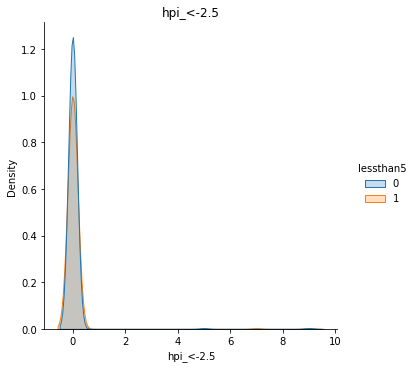

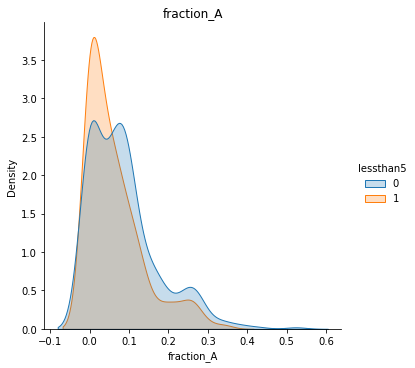

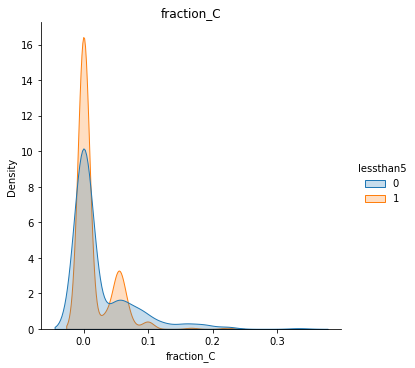

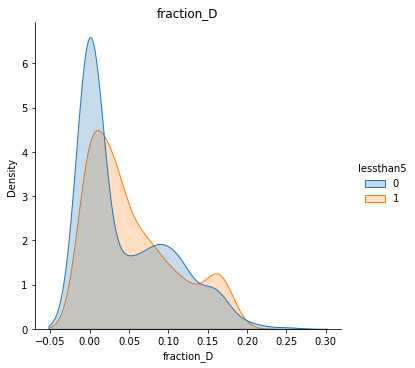

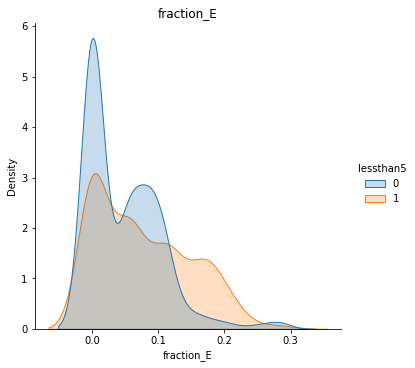

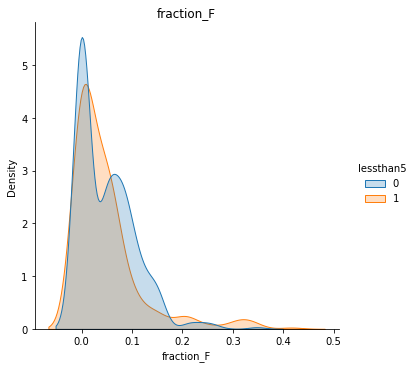

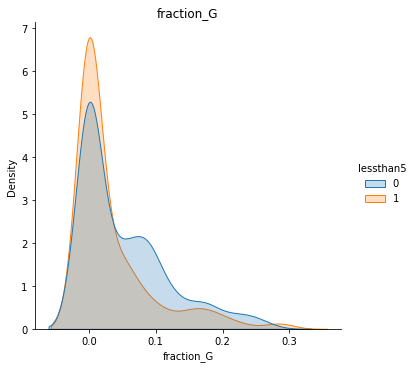

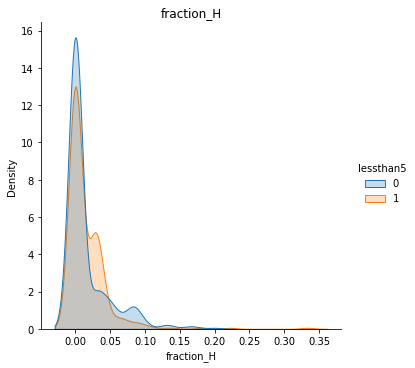

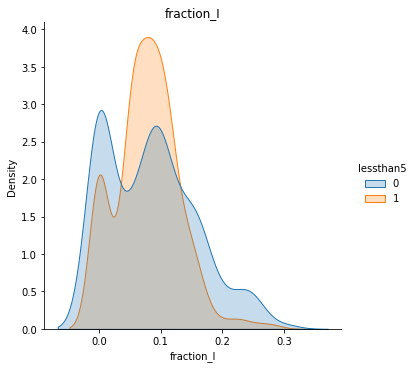

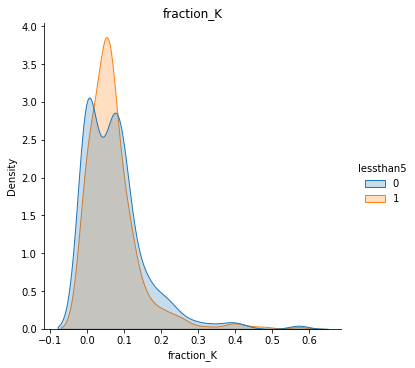

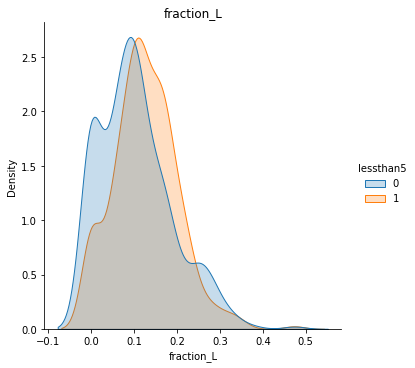

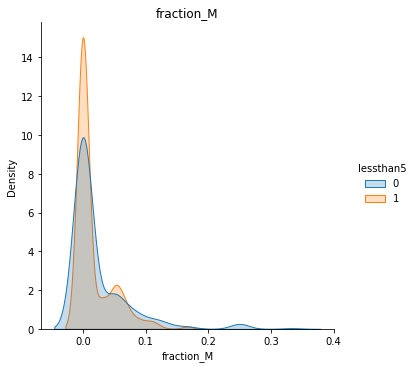

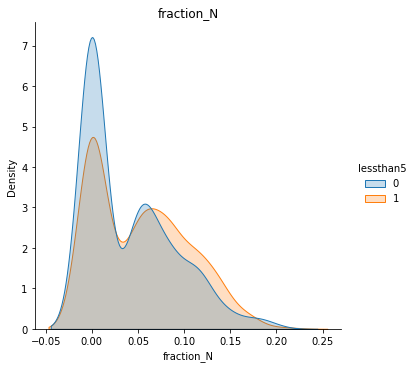

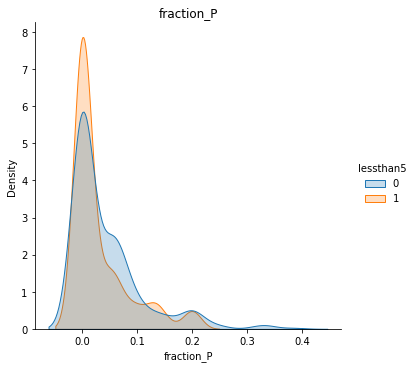

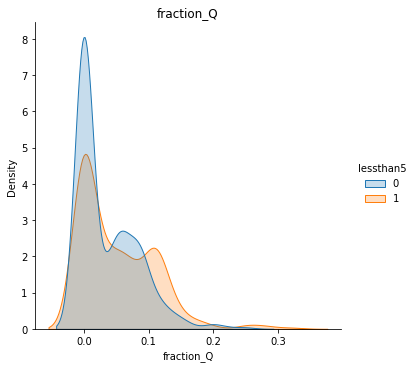

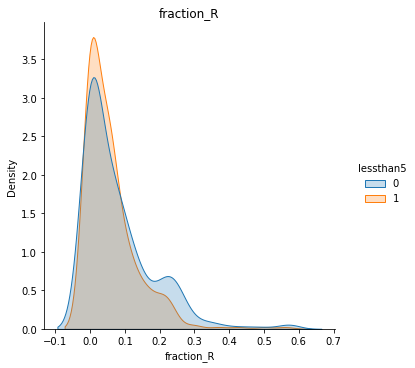

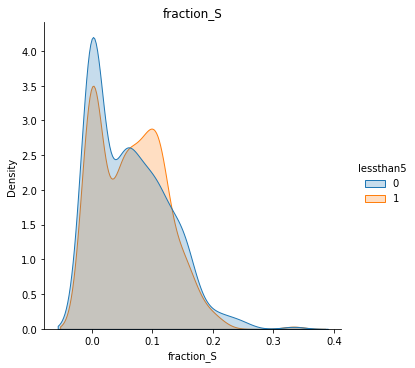

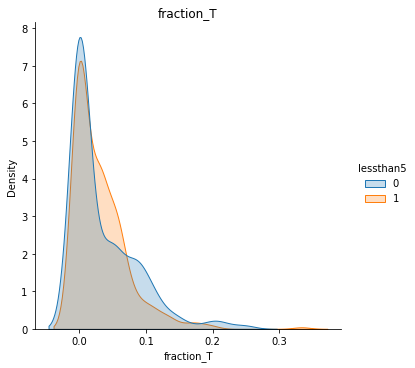

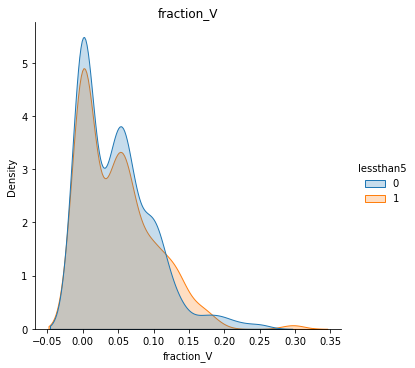

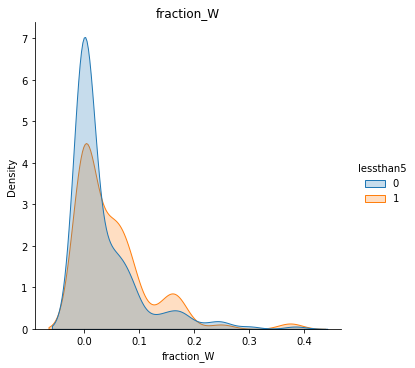

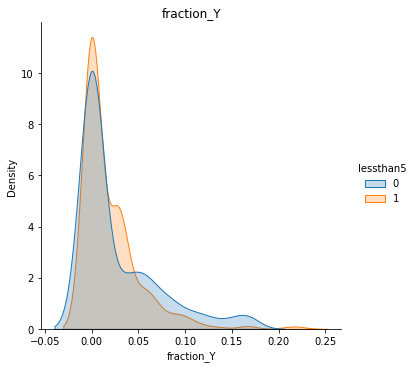

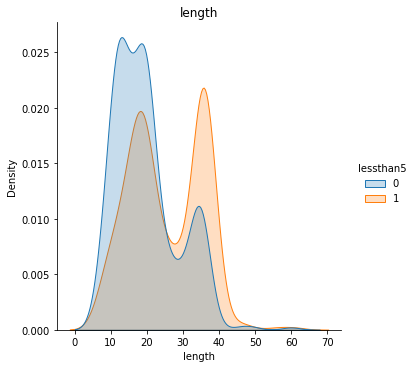

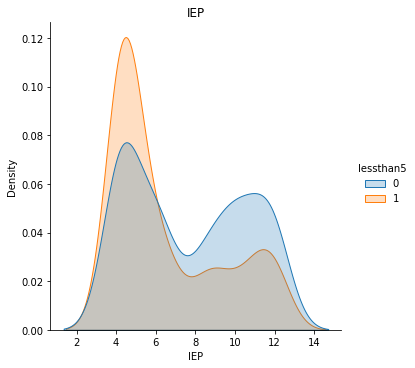

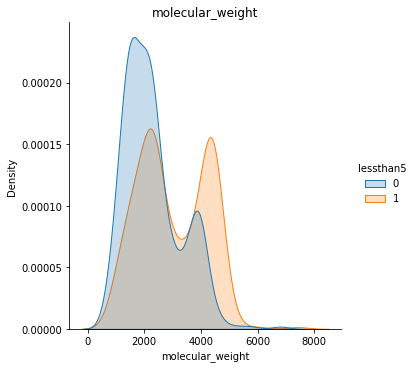

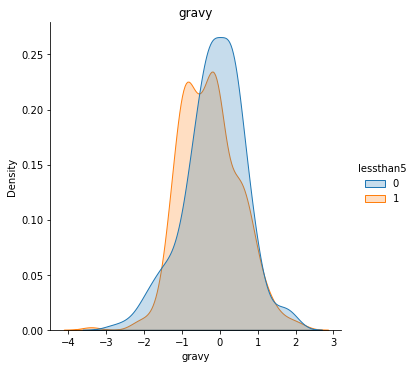

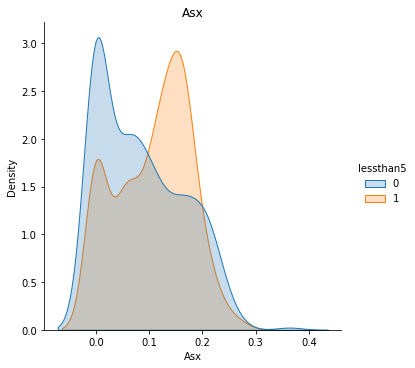

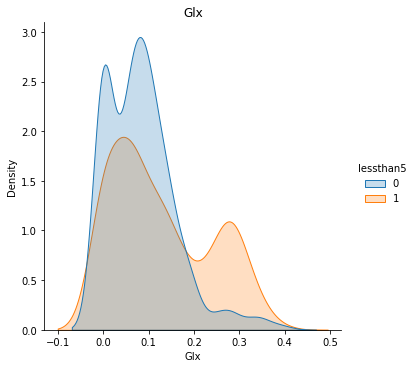

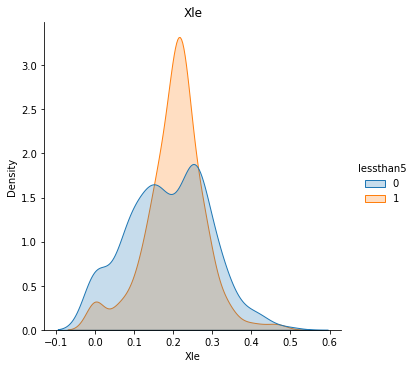

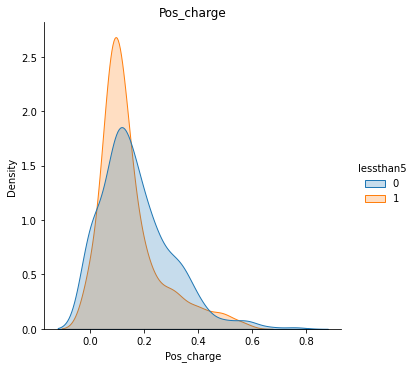

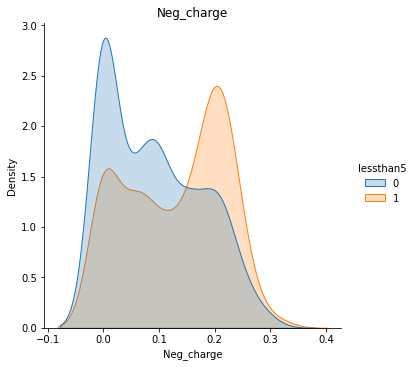

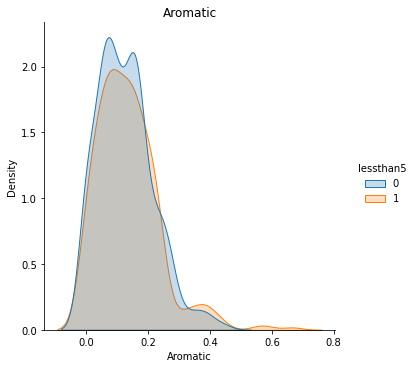

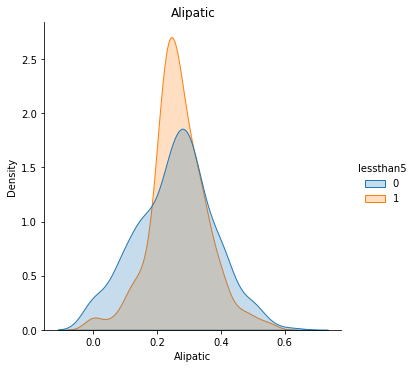

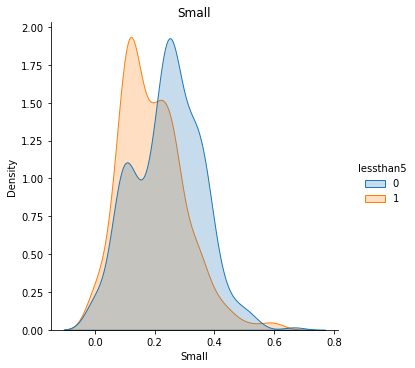

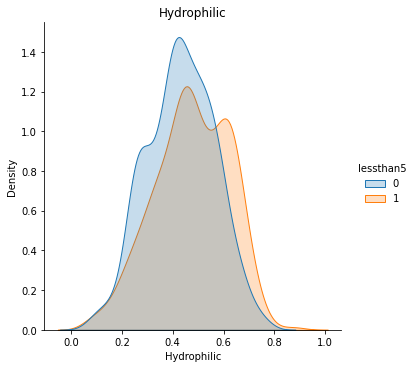

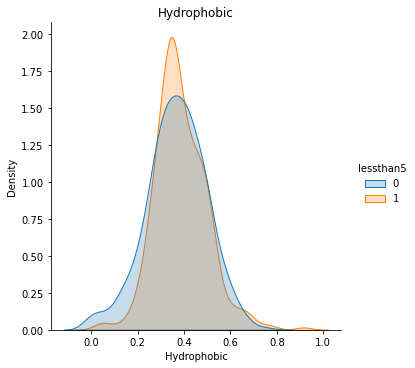

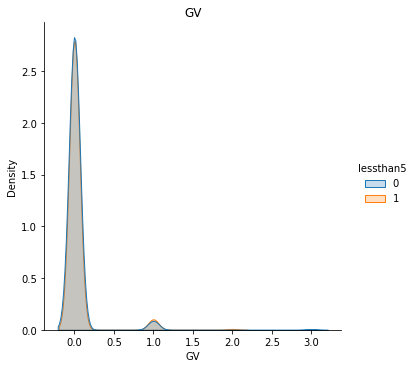

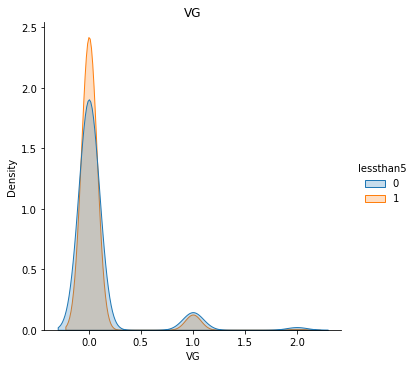

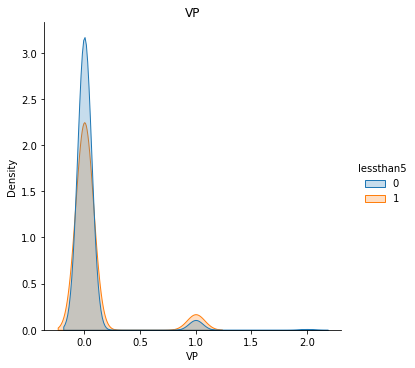

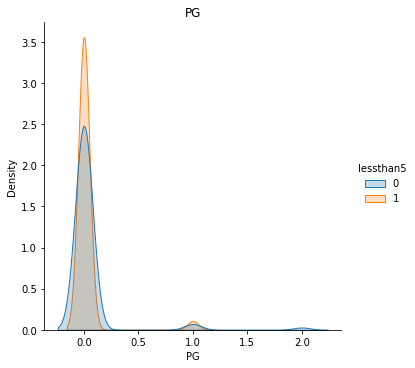

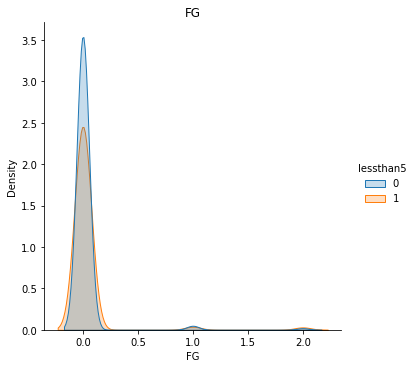

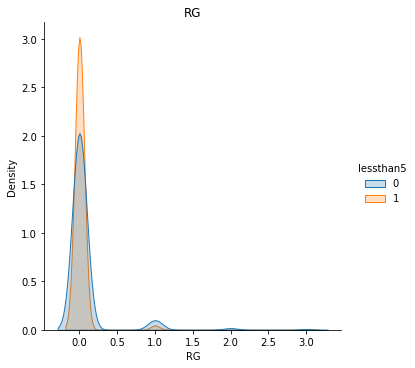

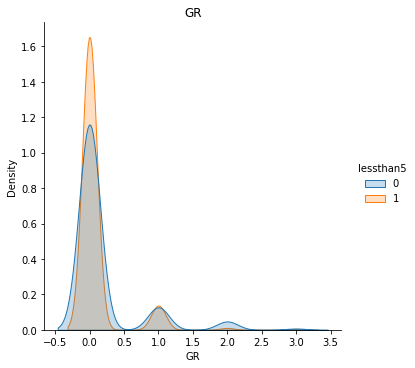

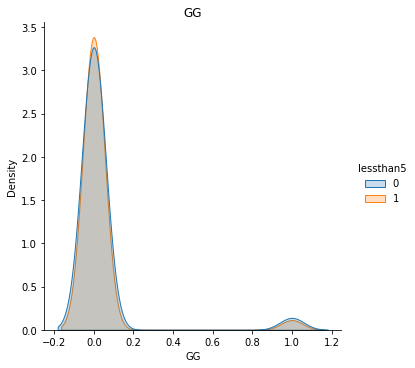

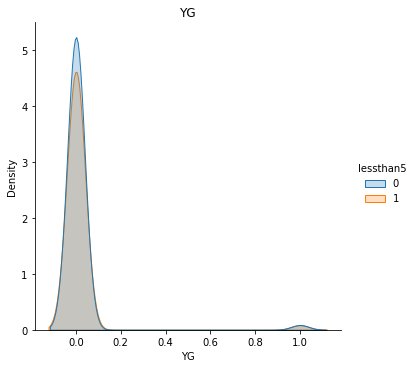

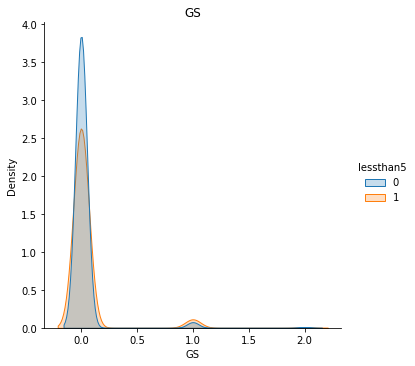

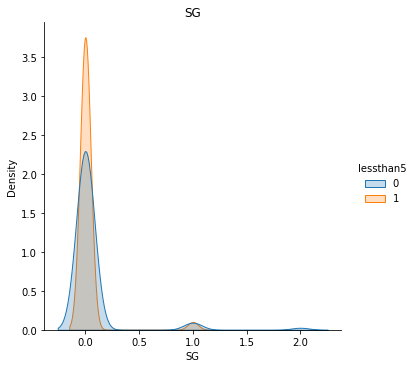

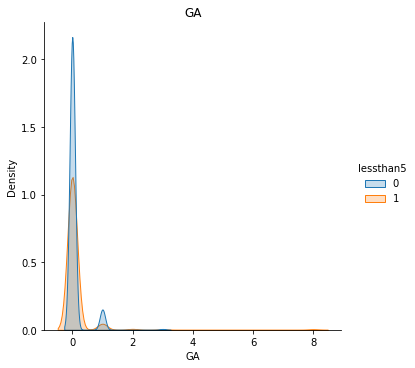

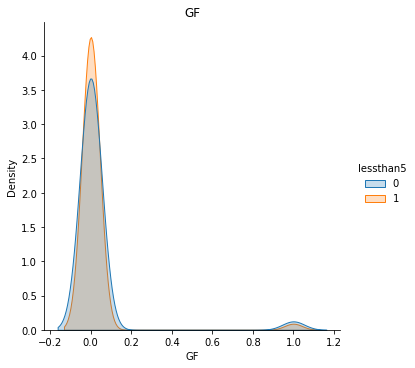

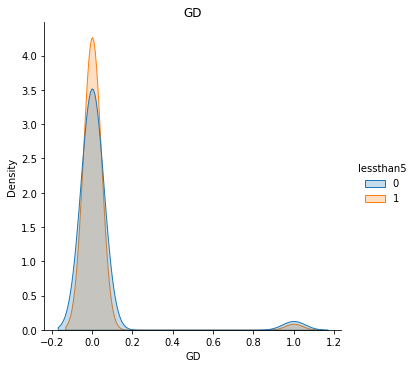

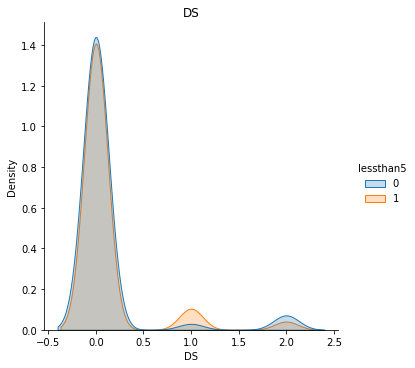

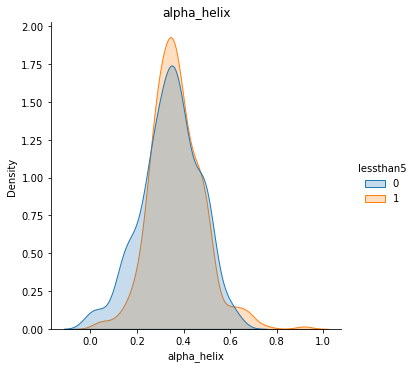

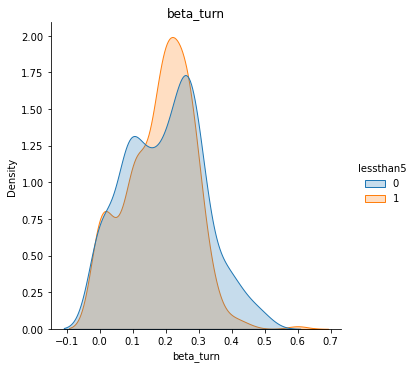

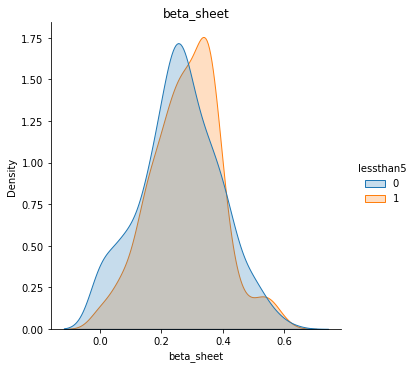

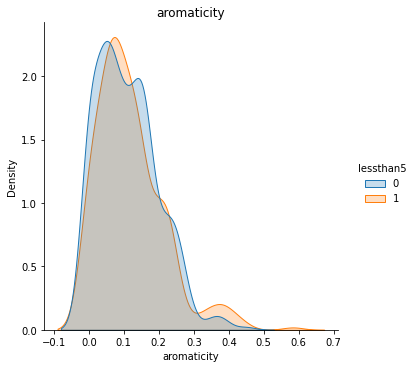

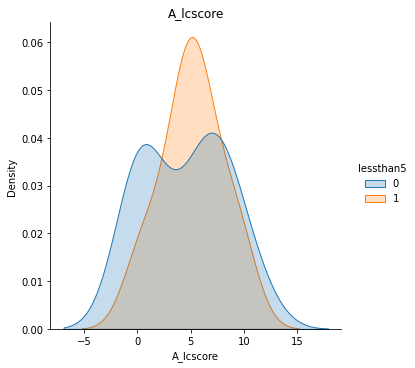

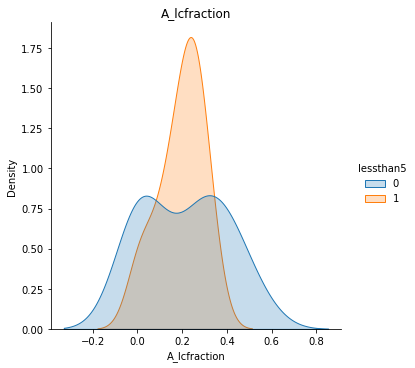

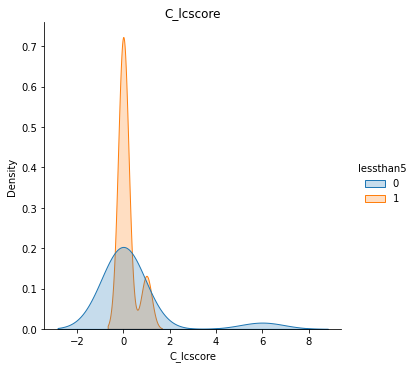

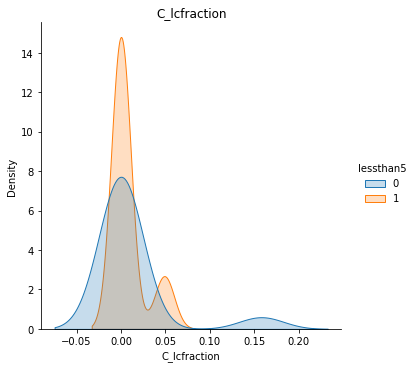

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


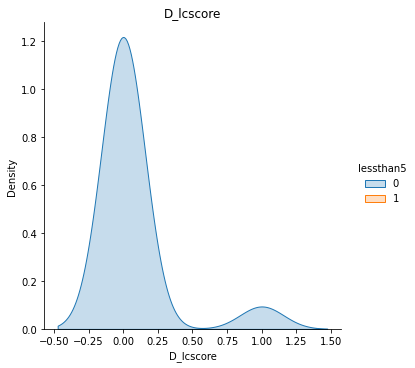

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


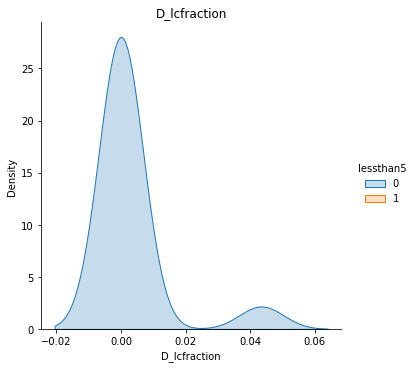

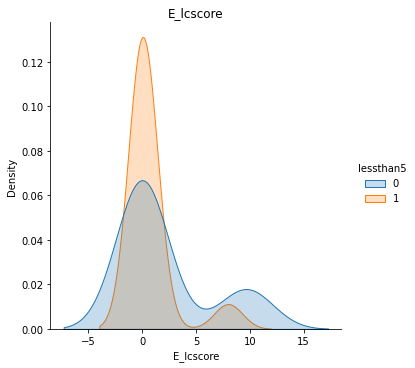

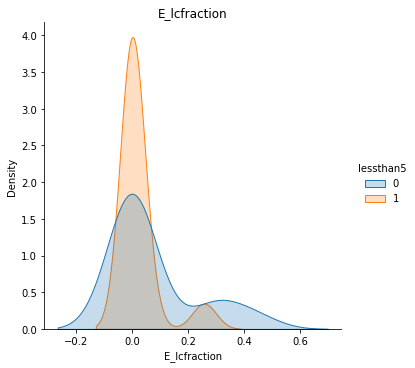

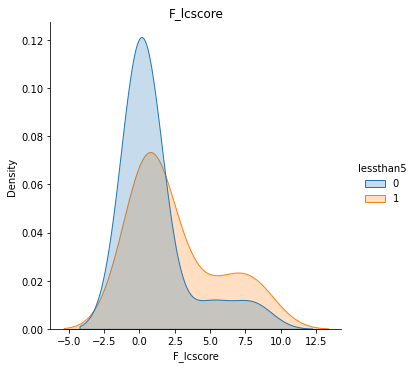

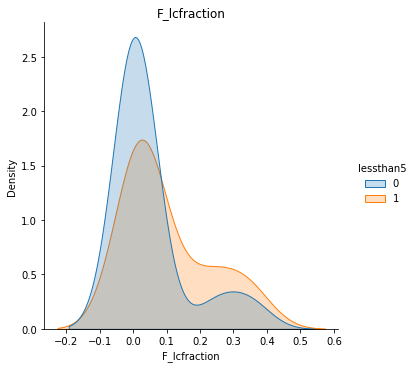

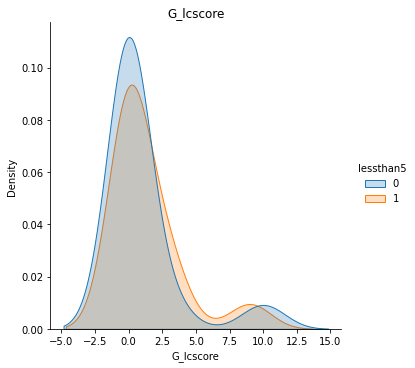

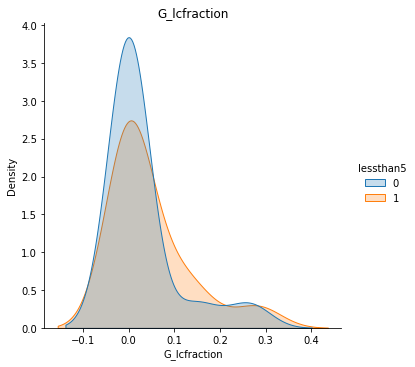

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


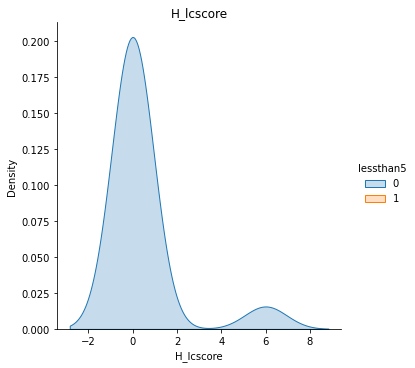

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


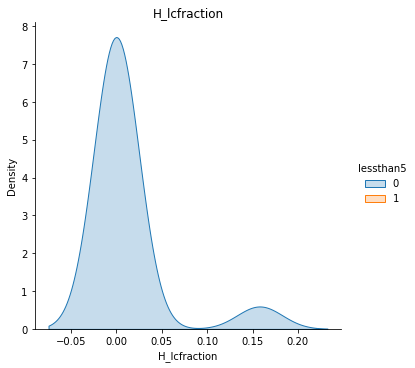

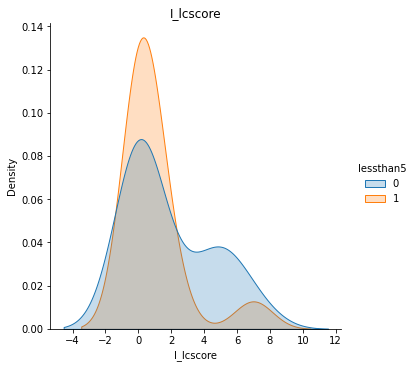

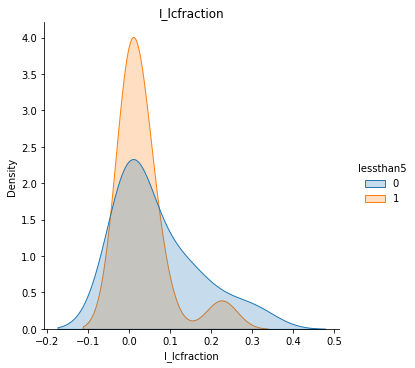

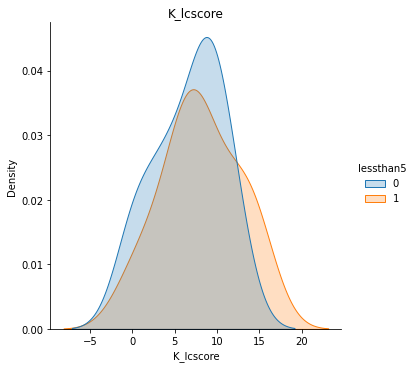

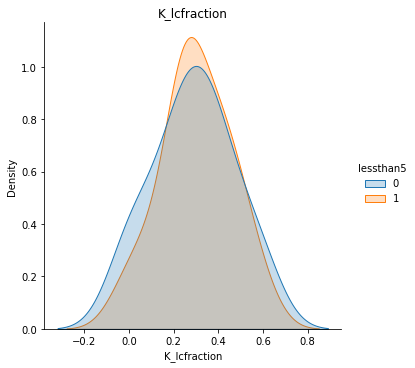

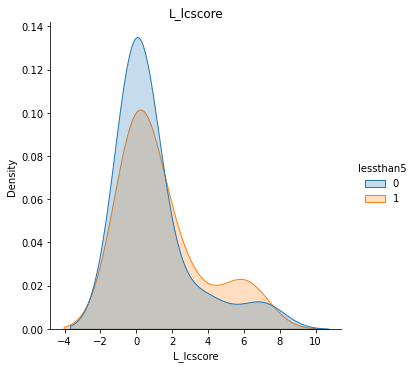

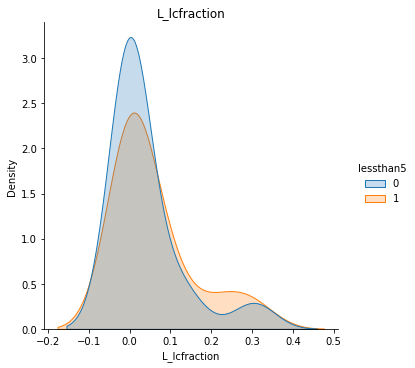

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


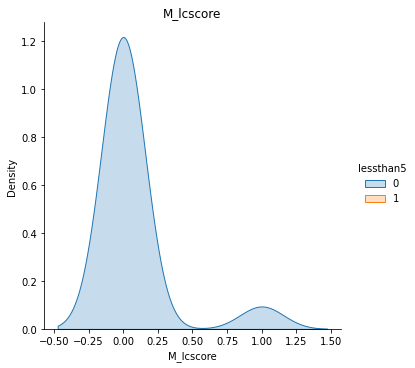

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


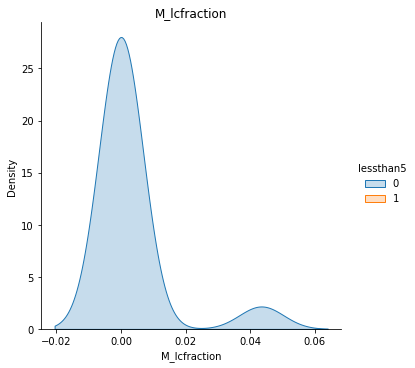

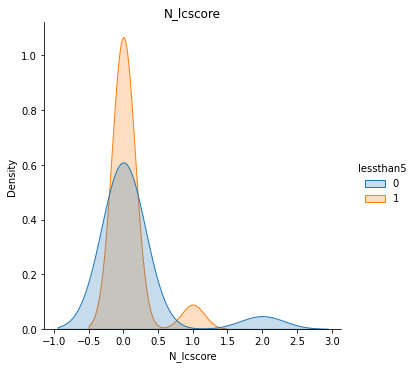

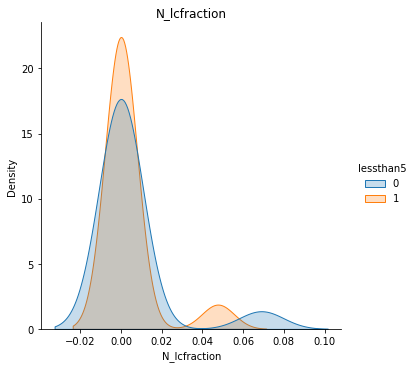

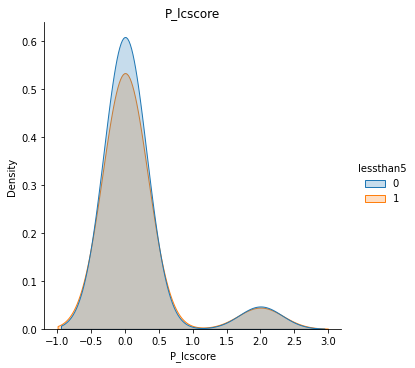

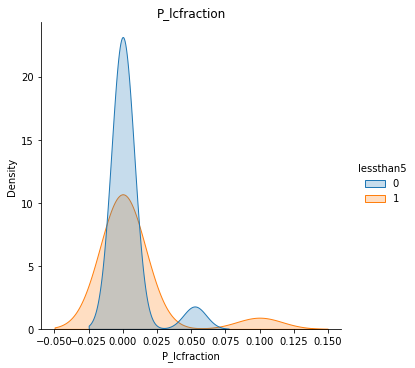

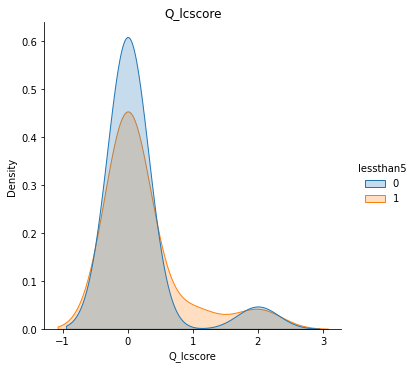

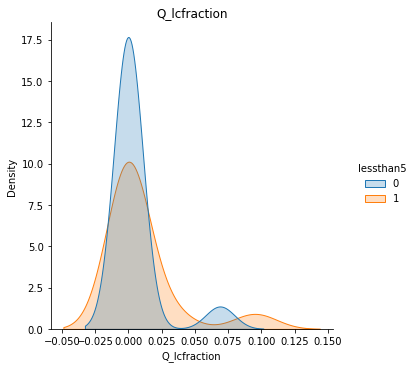

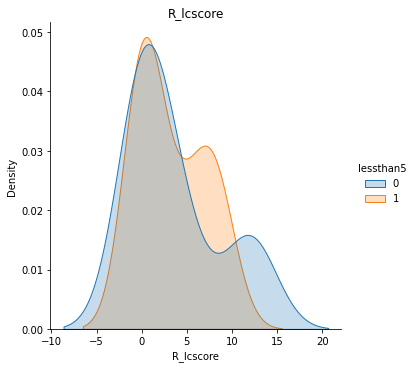

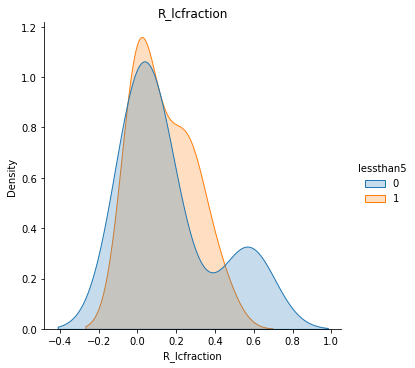

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


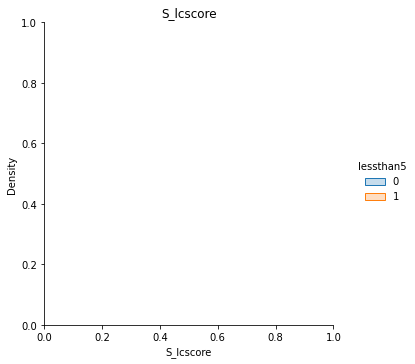

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


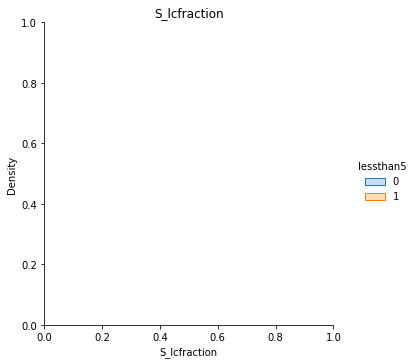

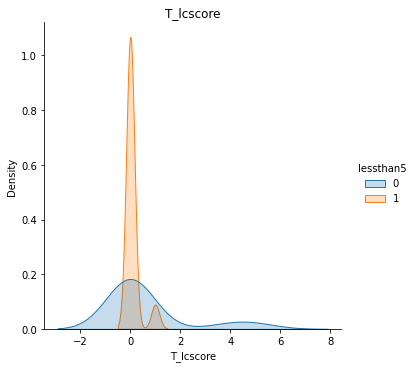

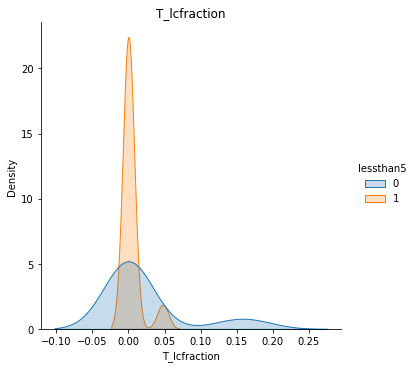

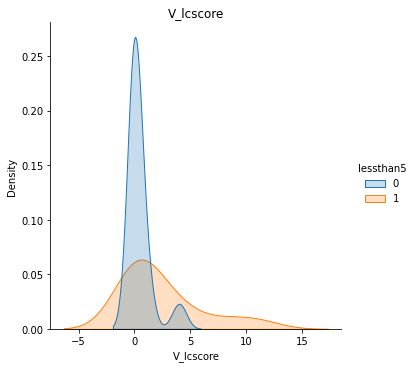

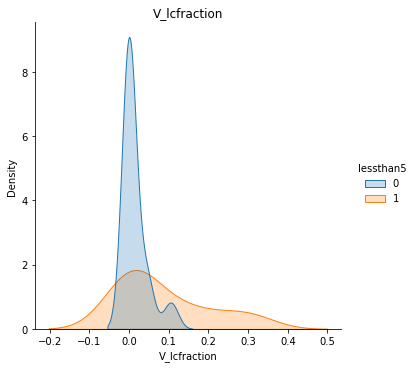

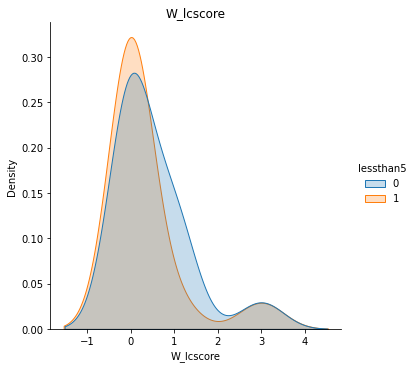

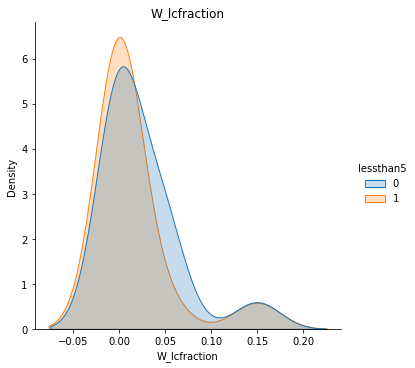

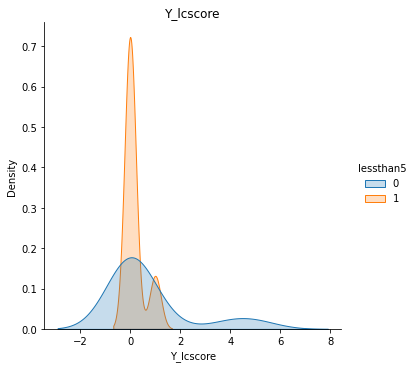

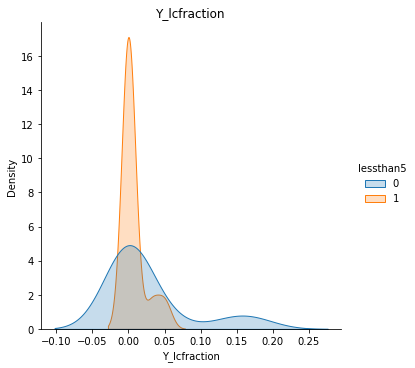

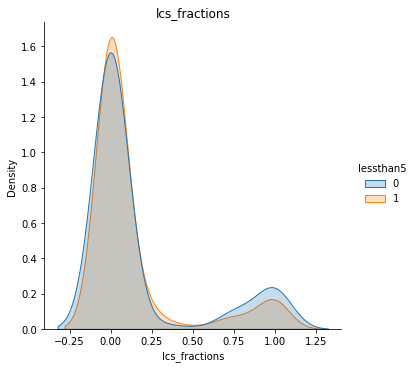

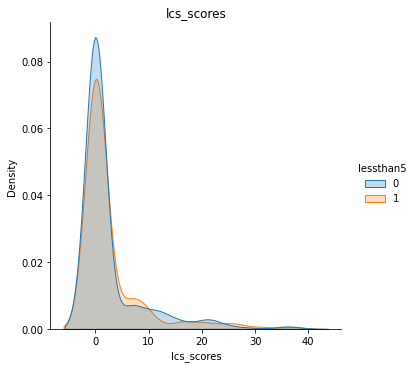

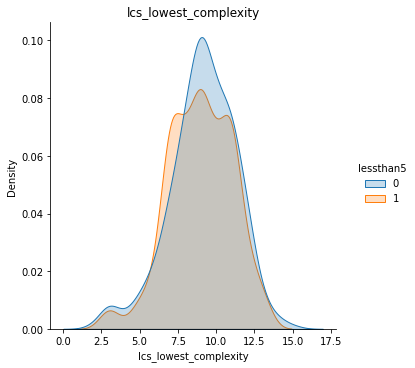

/Users/in-divye.singh/anaconda3/envs/life-science/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


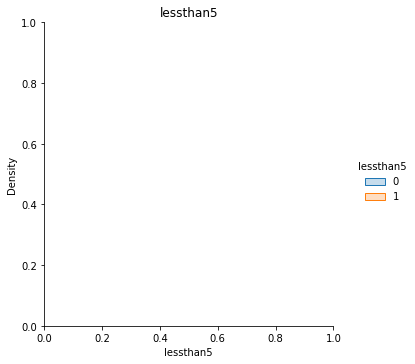

In [19]:
for feature in prop_cols:
    sns.displot(x=df[feature], hue=df['lessthan5'], kind="kde", fill=True)
    plt.title(feature)
    plt.show()

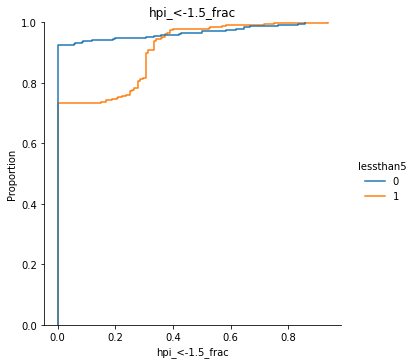

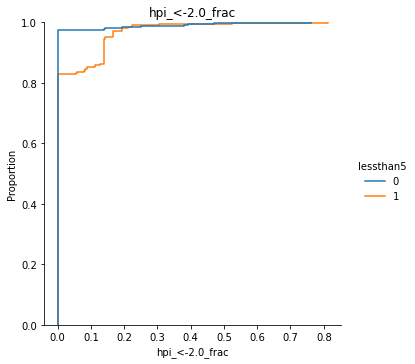

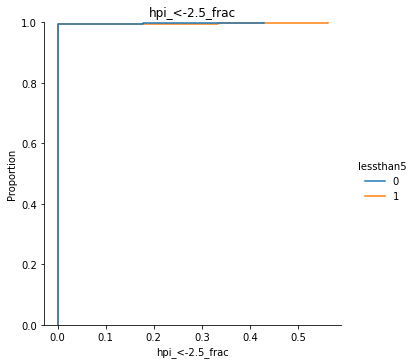

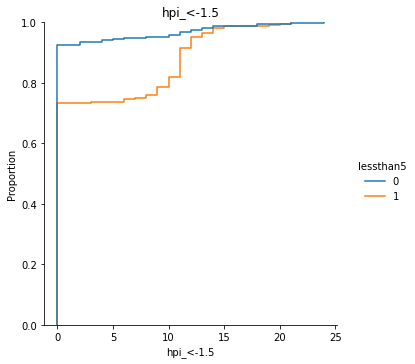

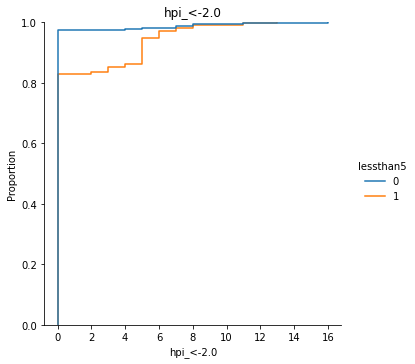

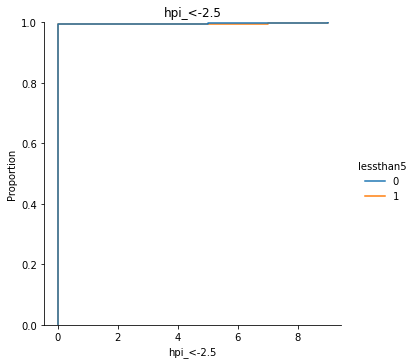

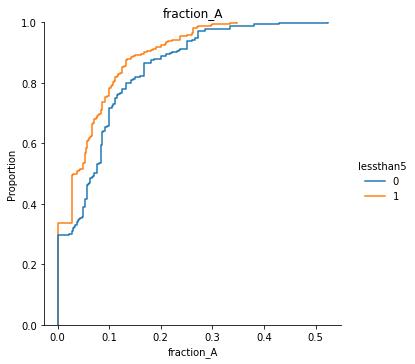

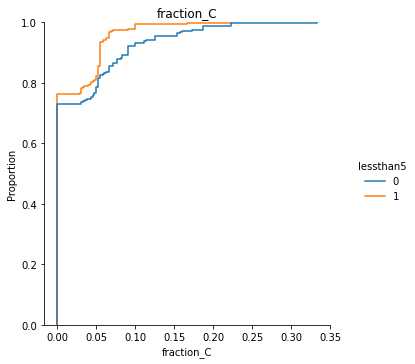

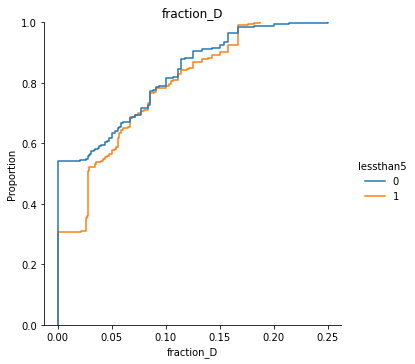

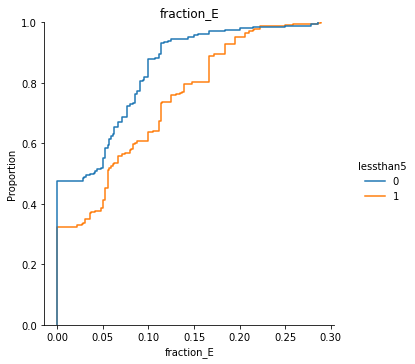

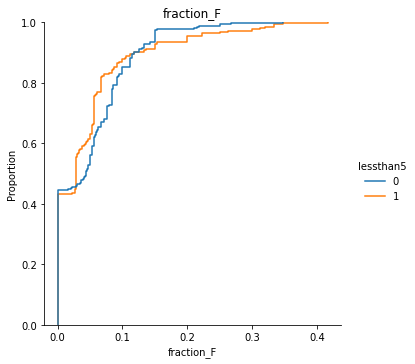

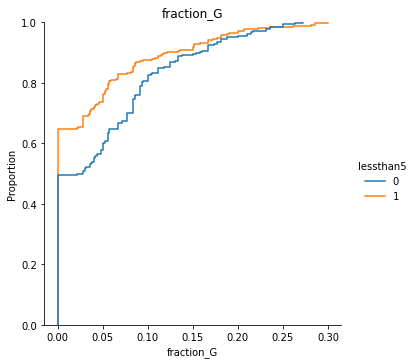

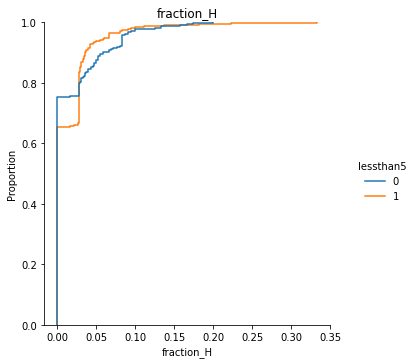

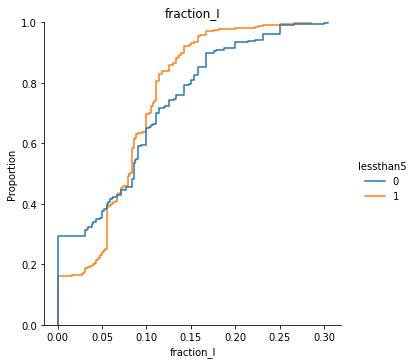

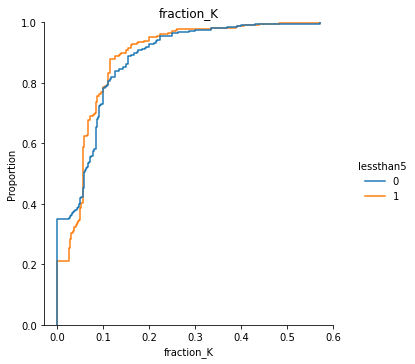

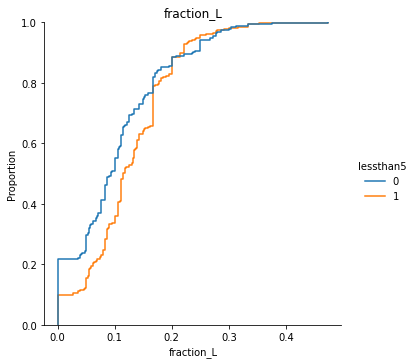

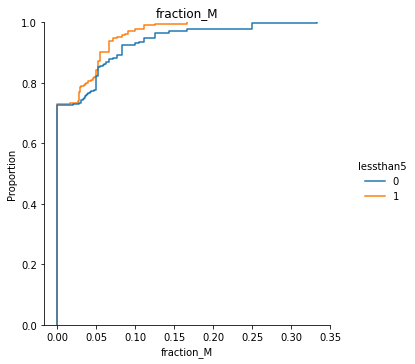

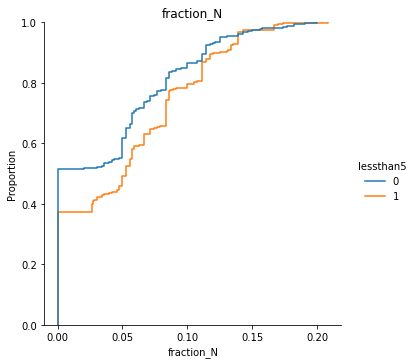

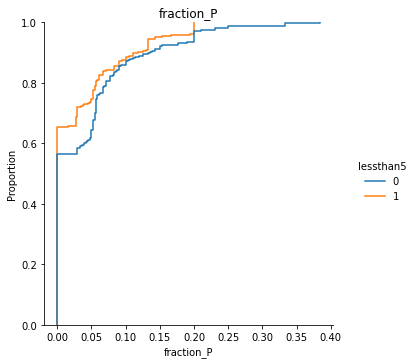

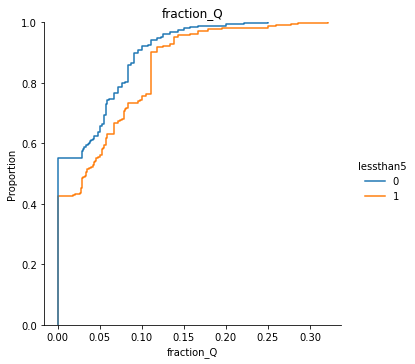

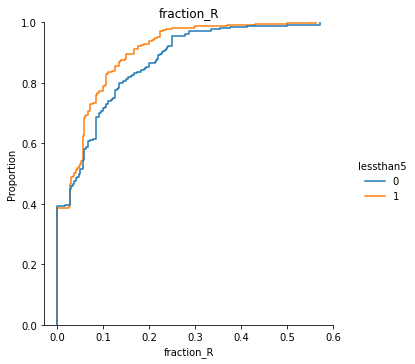

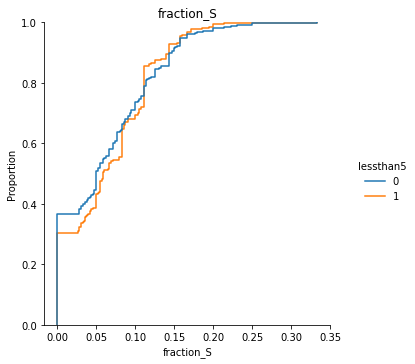

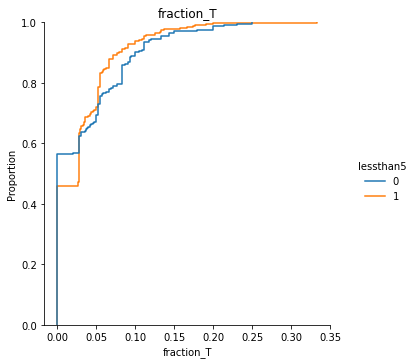

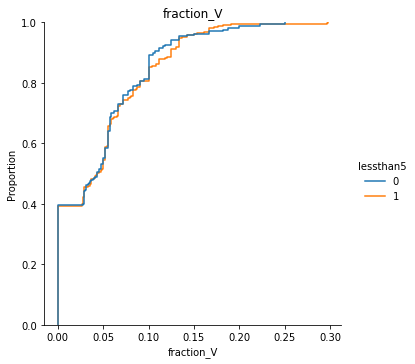

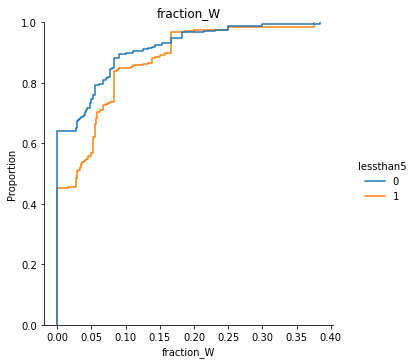

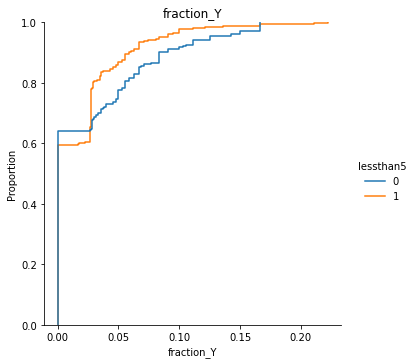

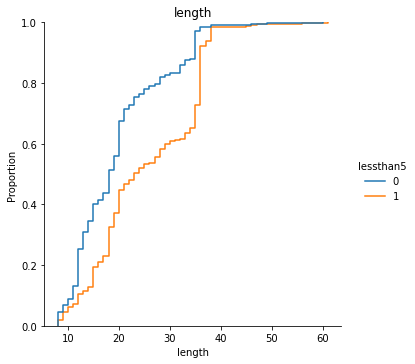

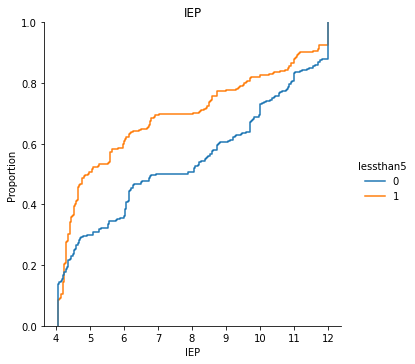

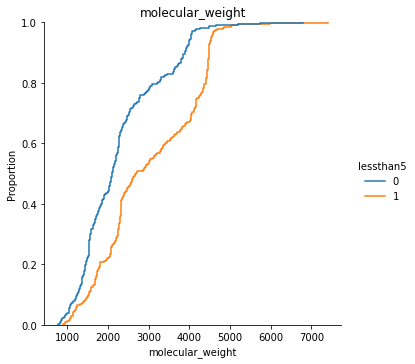

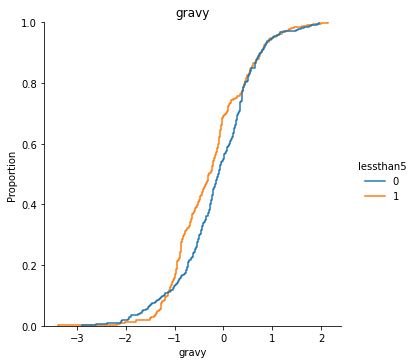

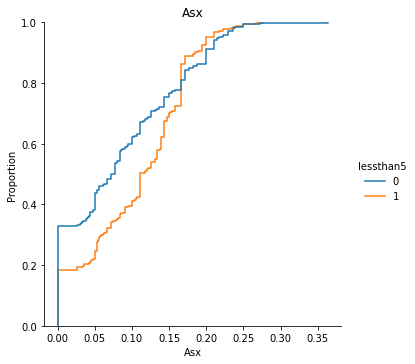

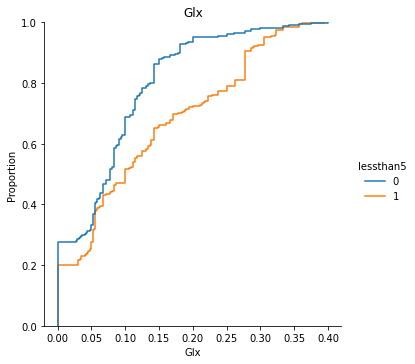

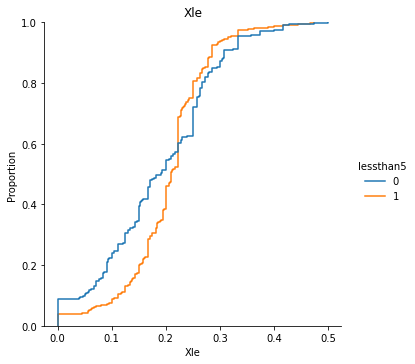

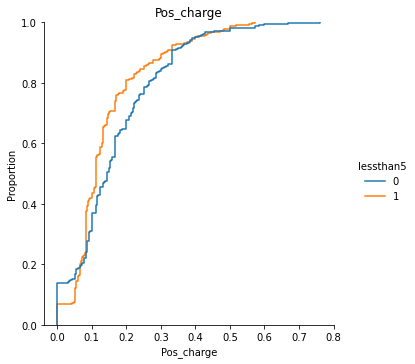

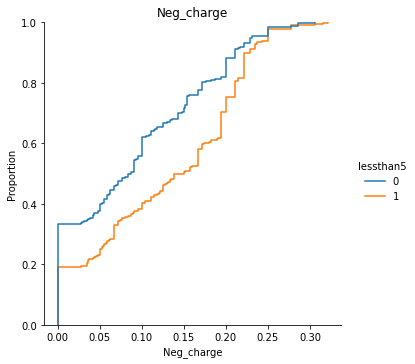

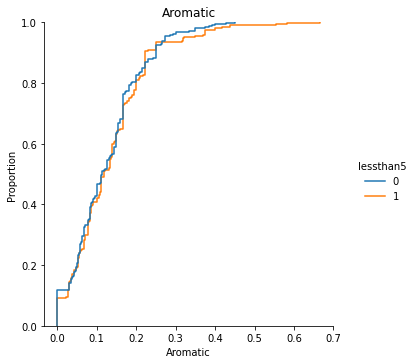

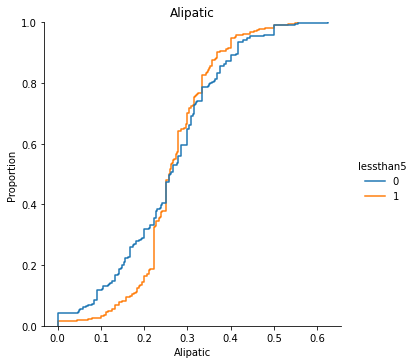

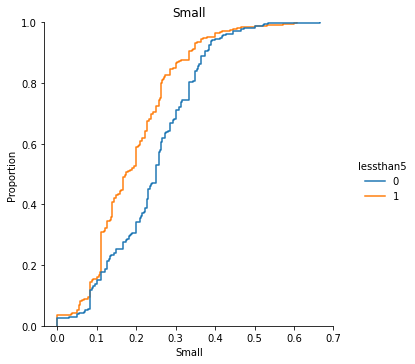

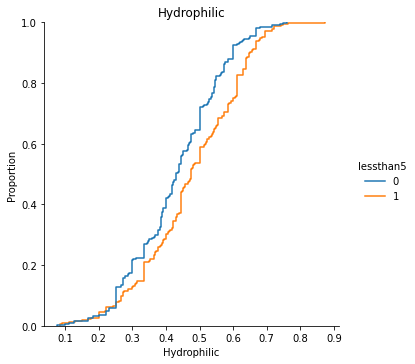

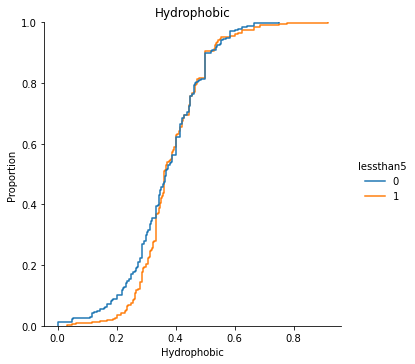

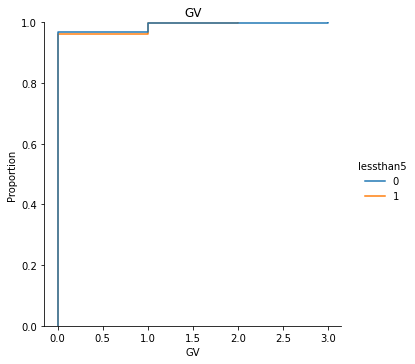

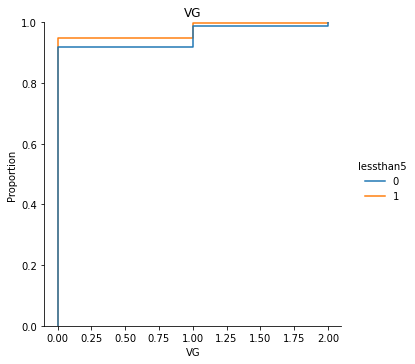

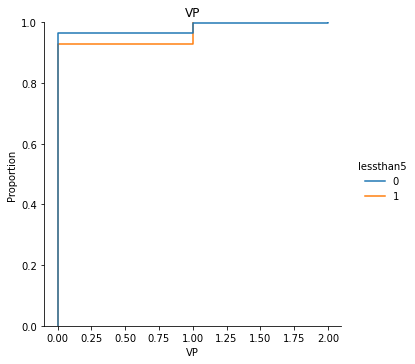

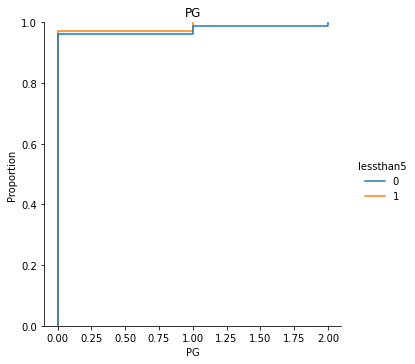

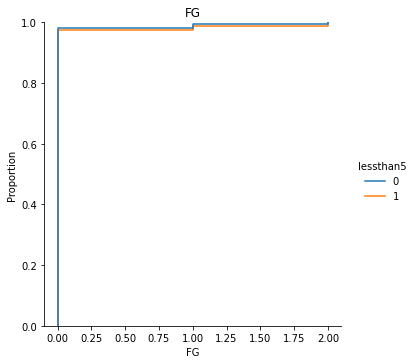

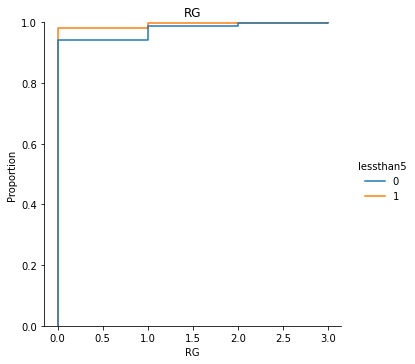

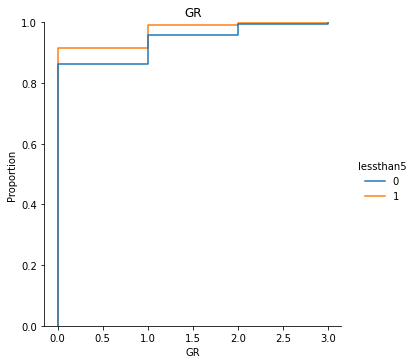

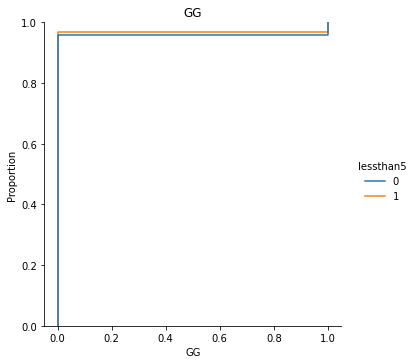

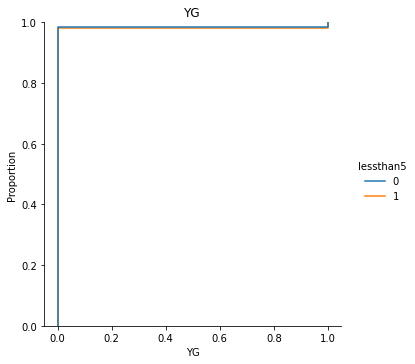

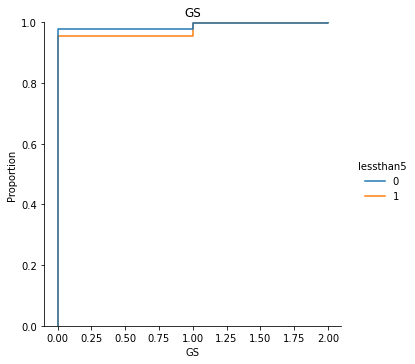

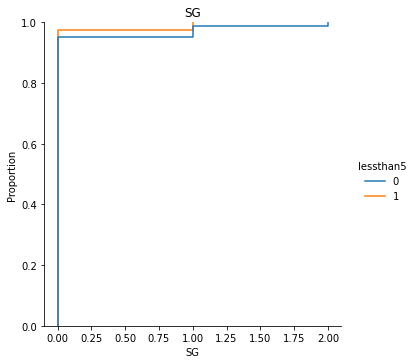

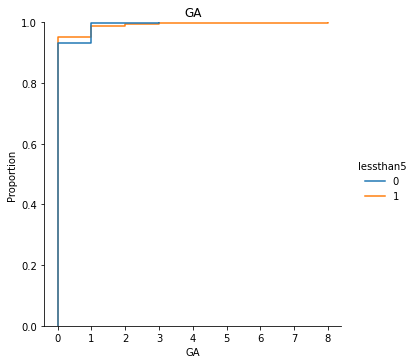

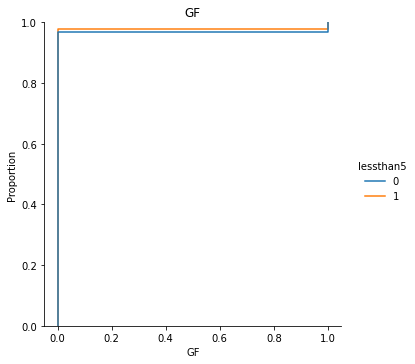

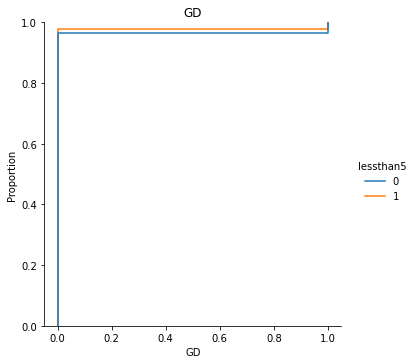

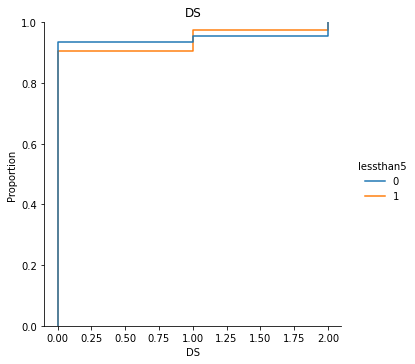

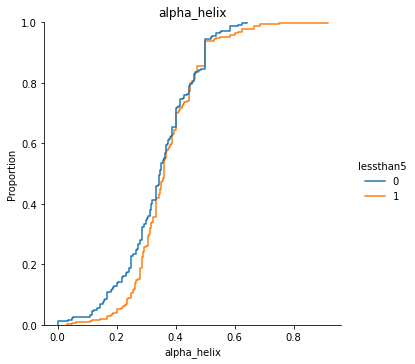

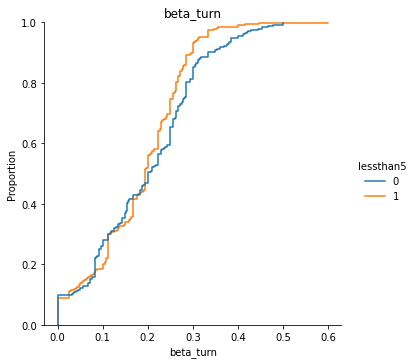

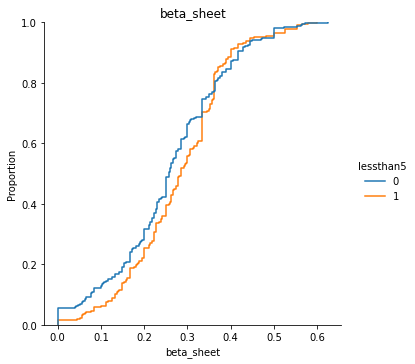

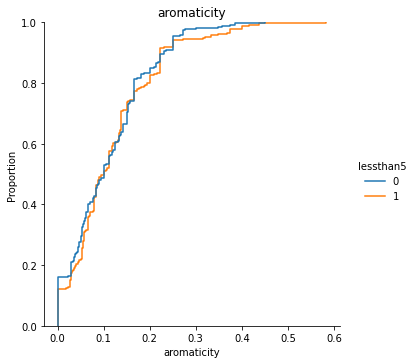

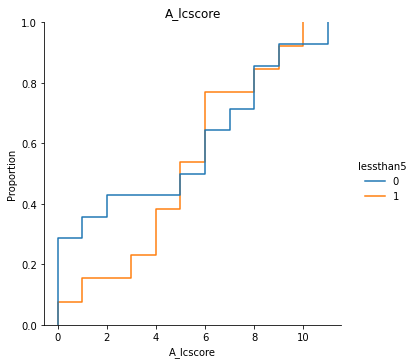

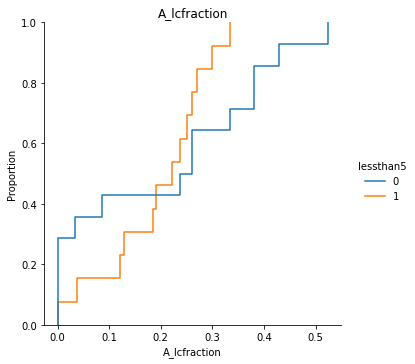

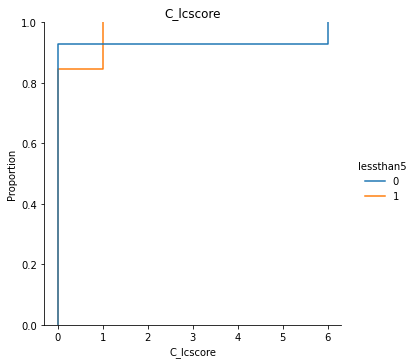

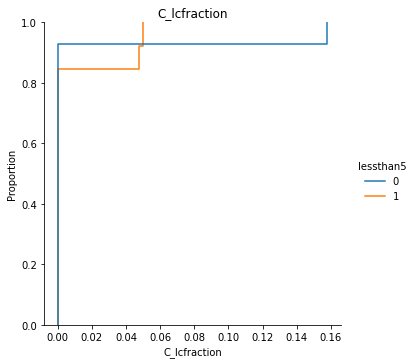

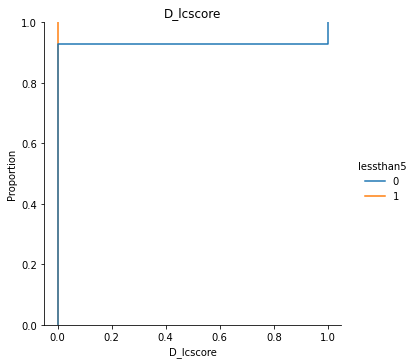

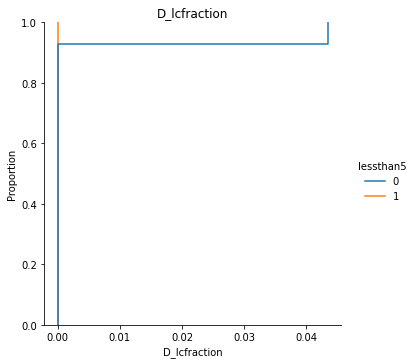

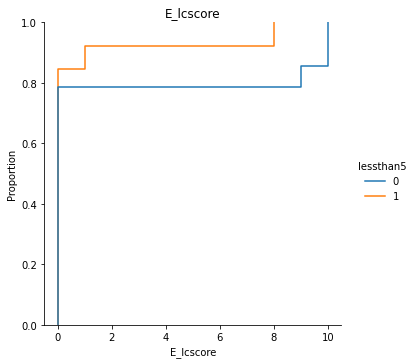

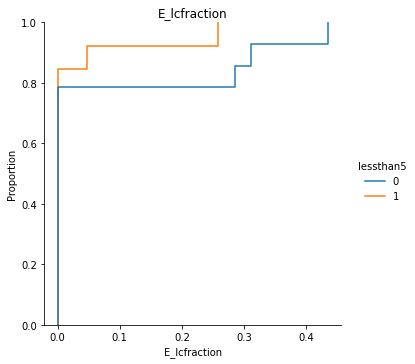

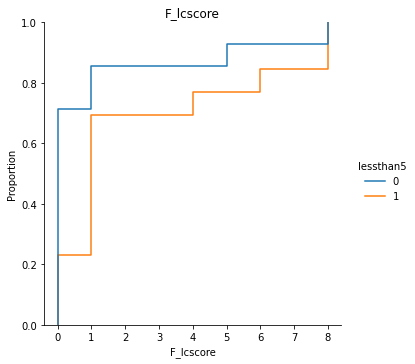

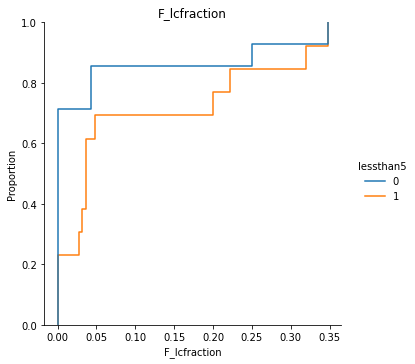

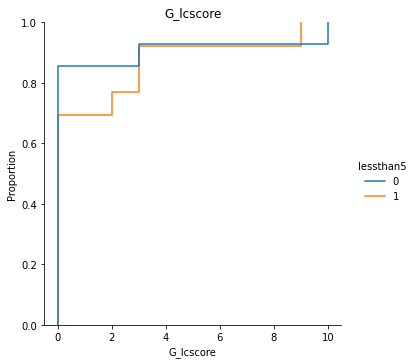

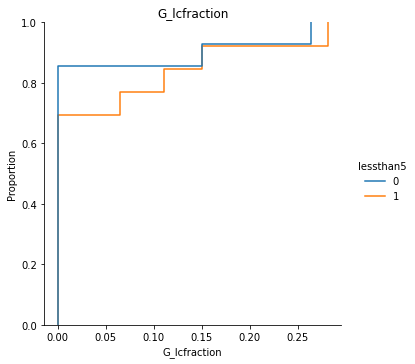

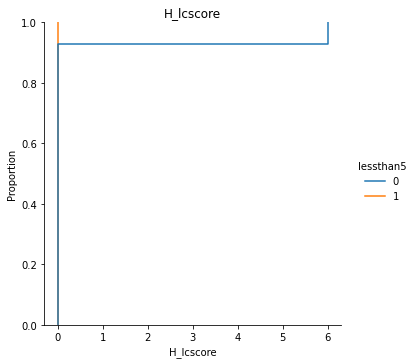

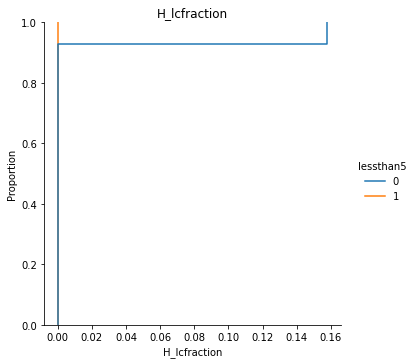

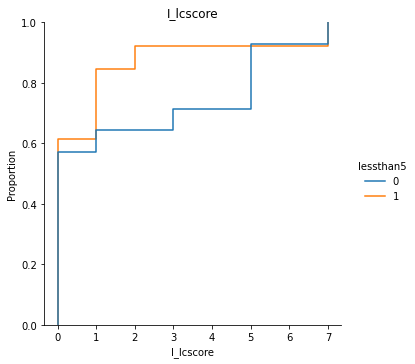

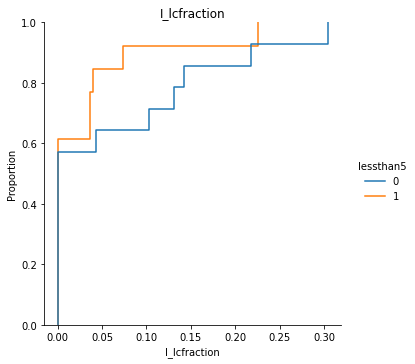

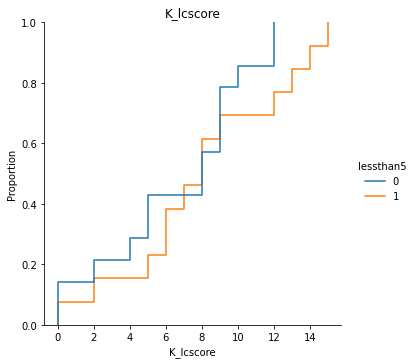

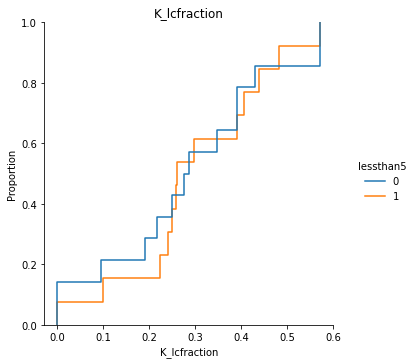

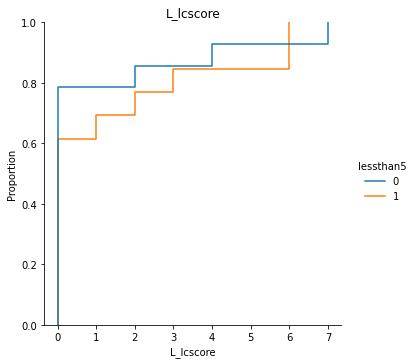

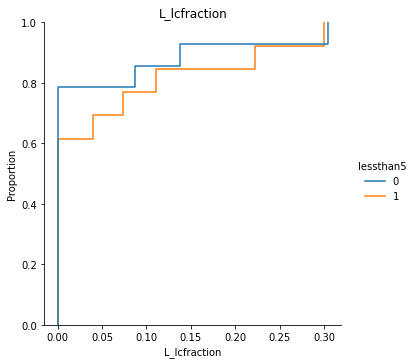

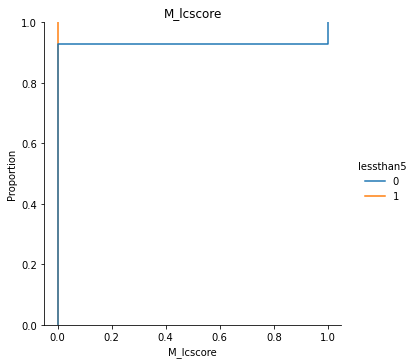

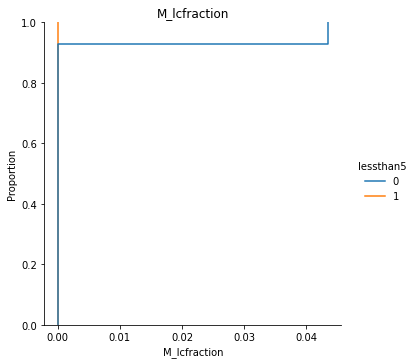

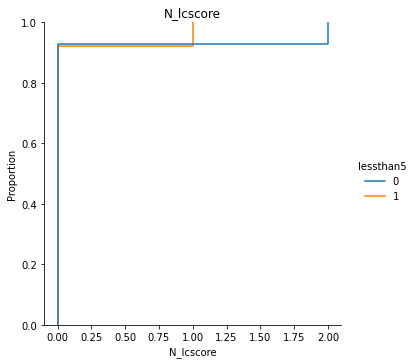

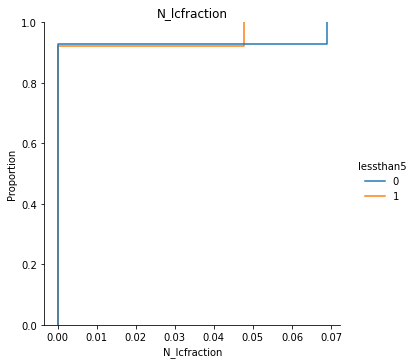

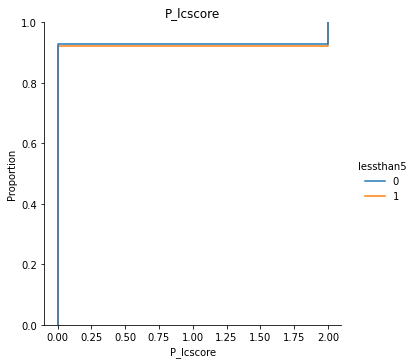

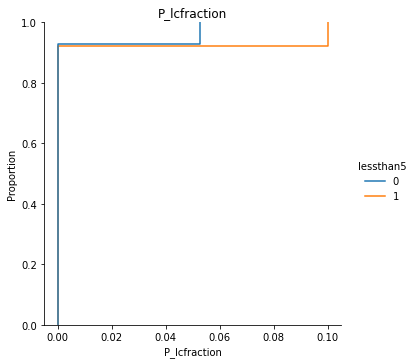

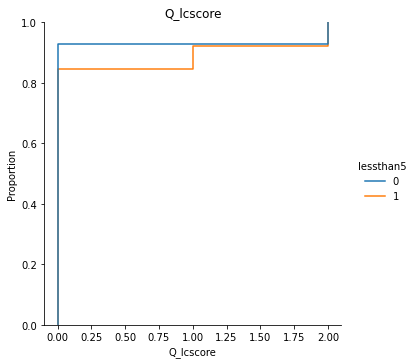

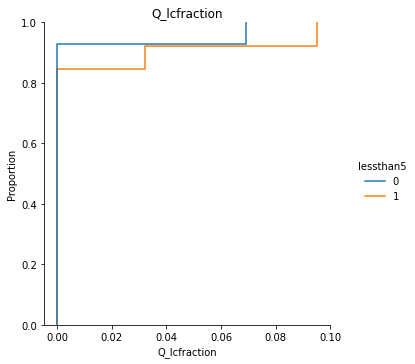

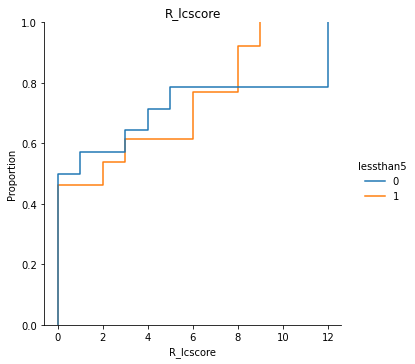

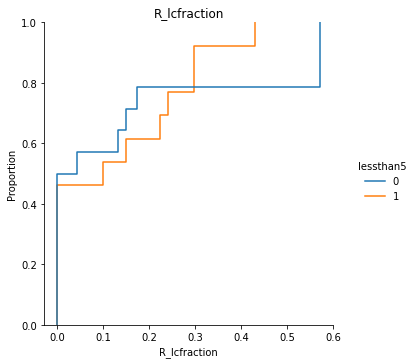

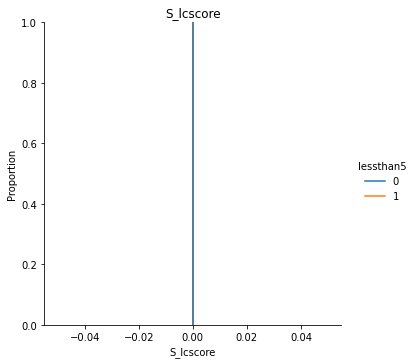

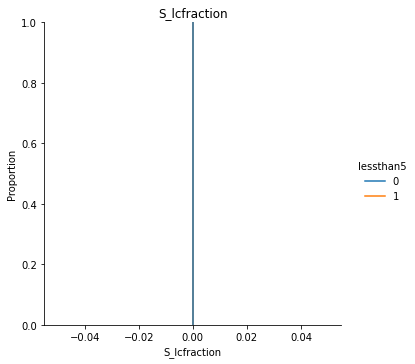

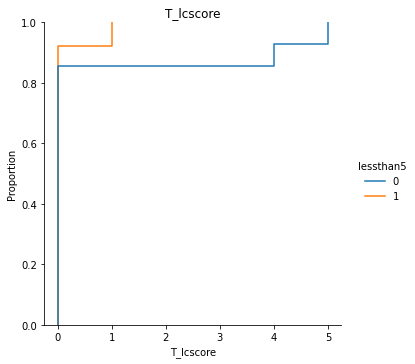

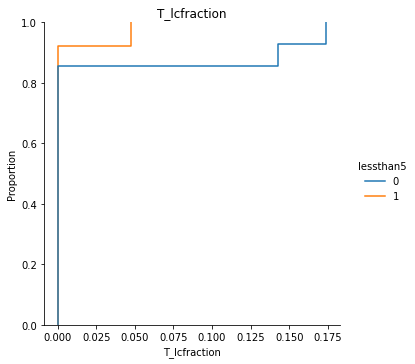

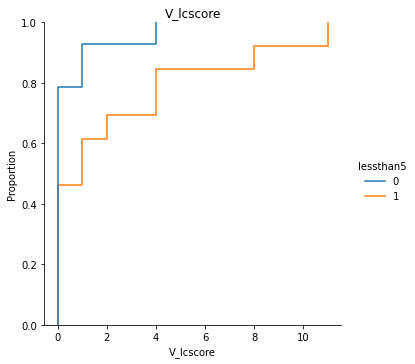

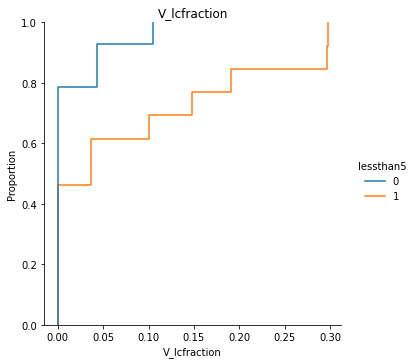

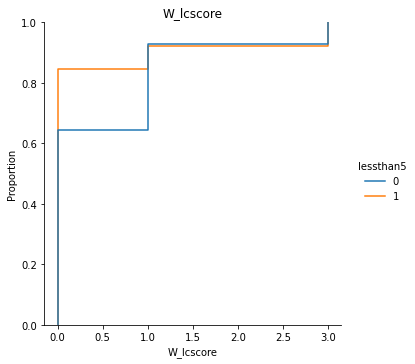

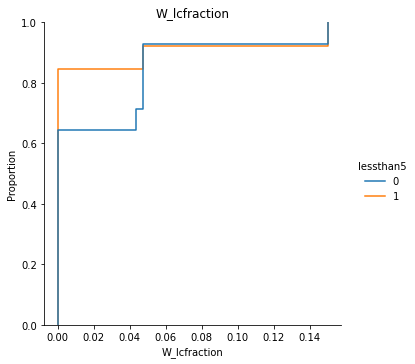

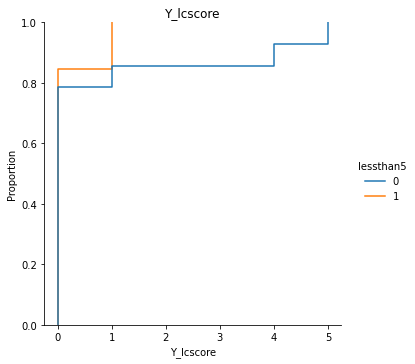

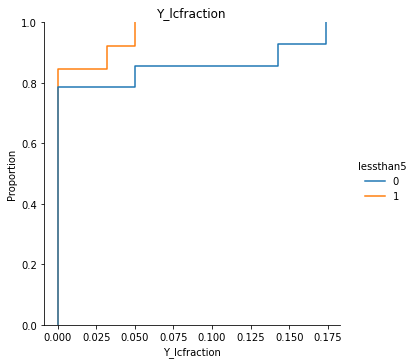

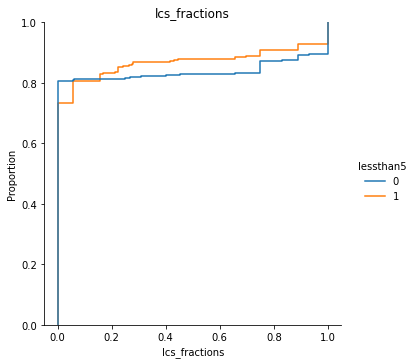

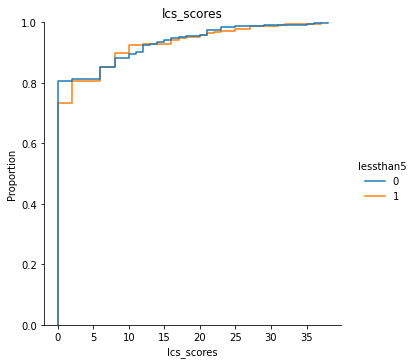

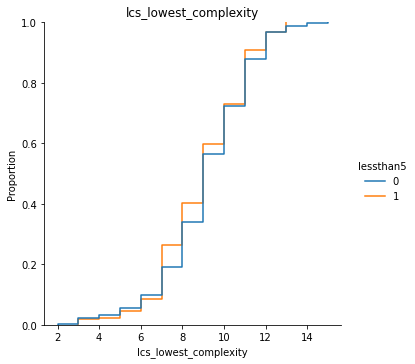

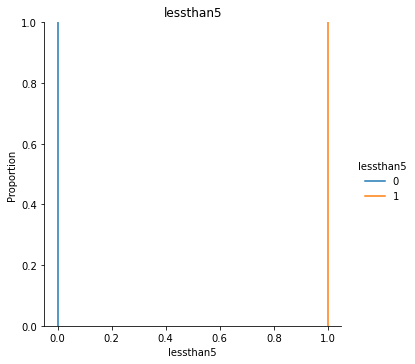

In [20]:
for feature in prop_cols:
    sns.displot(x=df[feature], hue=df['lessthan5'], kind="ecdf")
    plt.title(feature)
    plt.show()

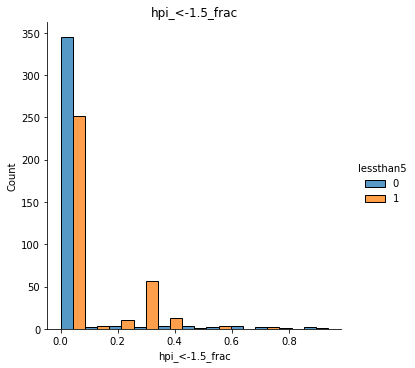

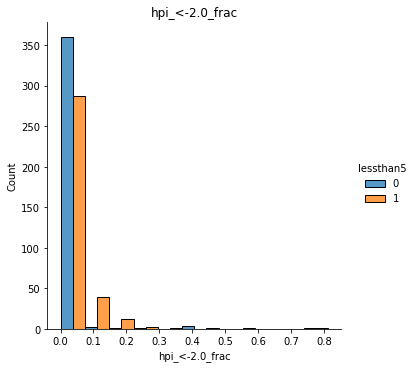

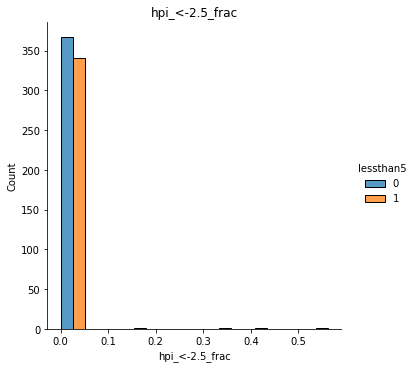

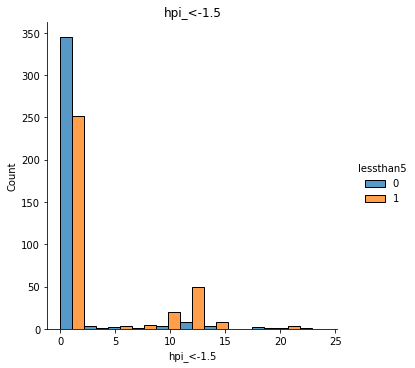

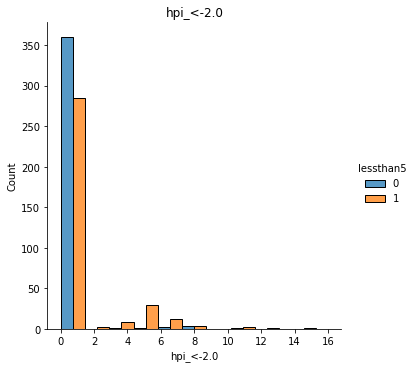

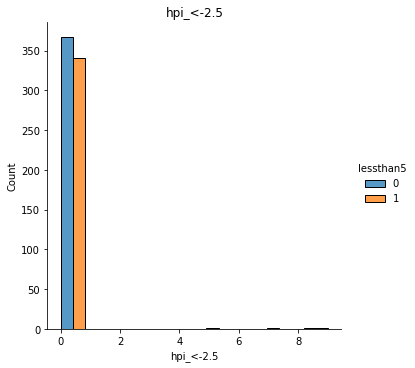

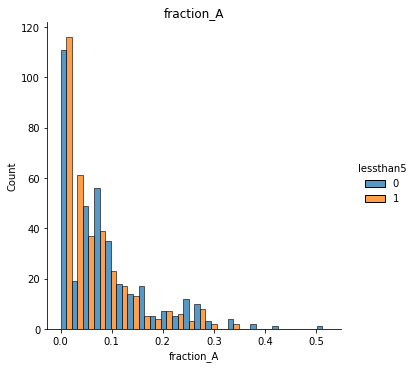

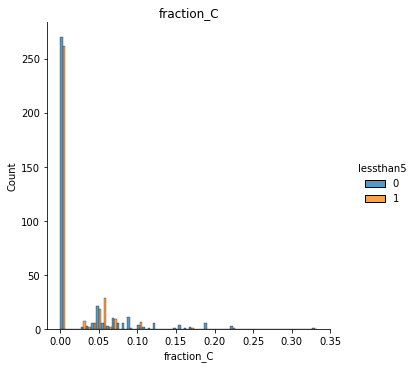

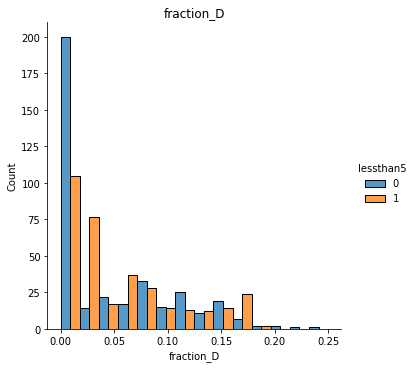

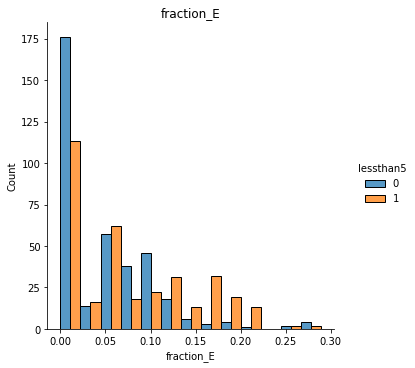

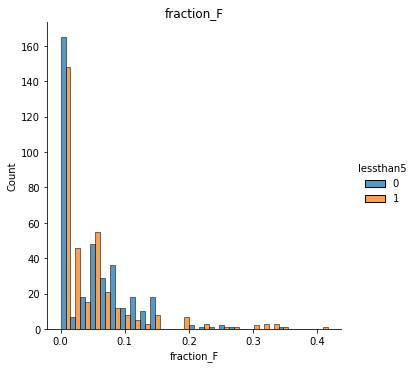

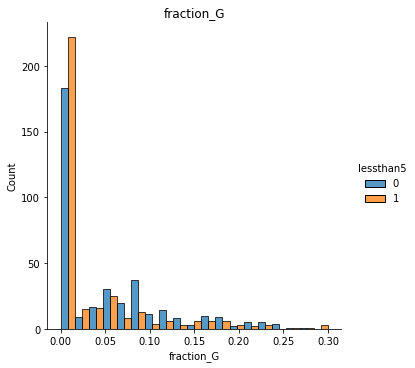

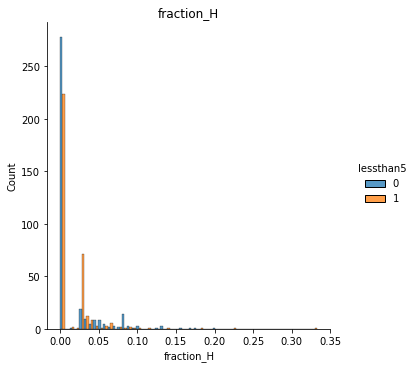

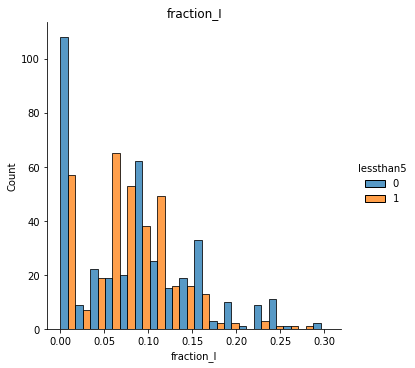

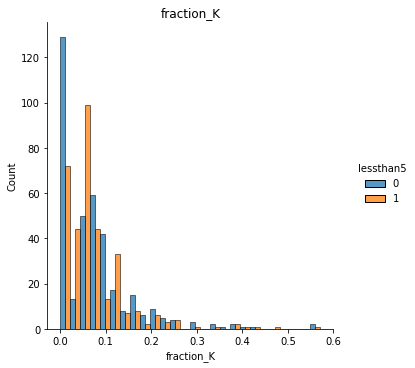

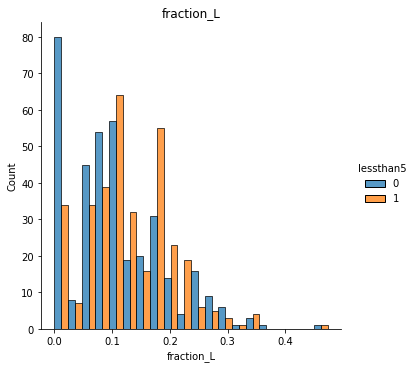

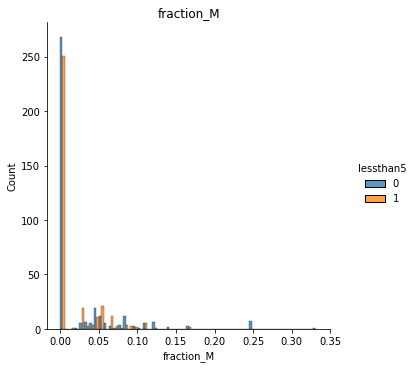

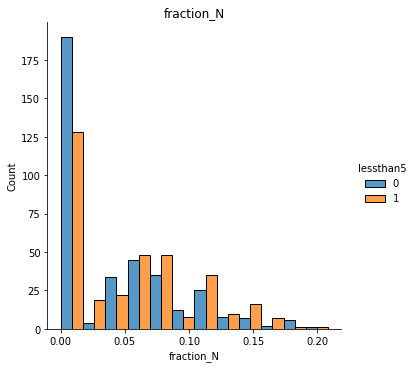

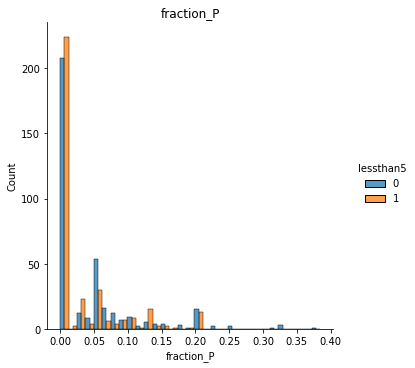

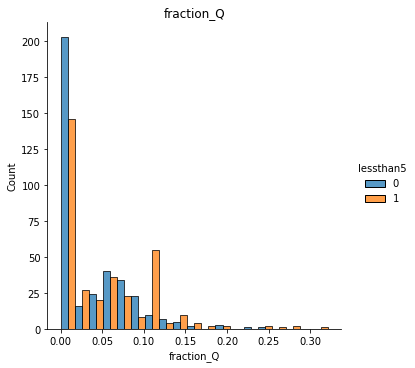

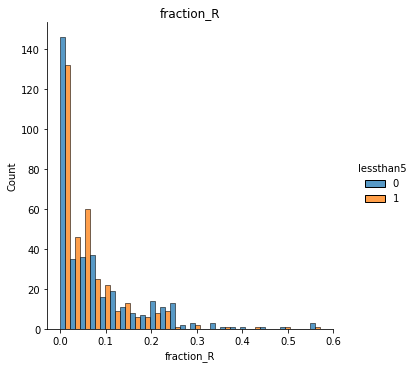

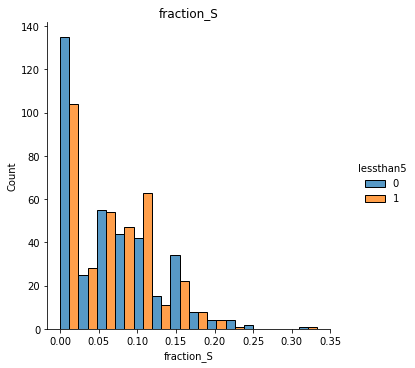

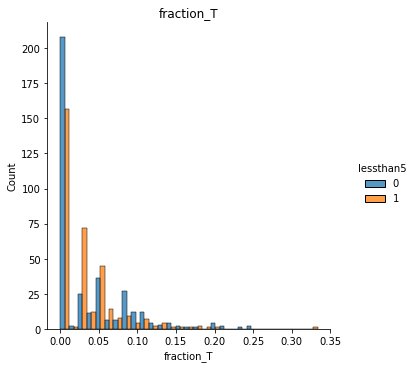

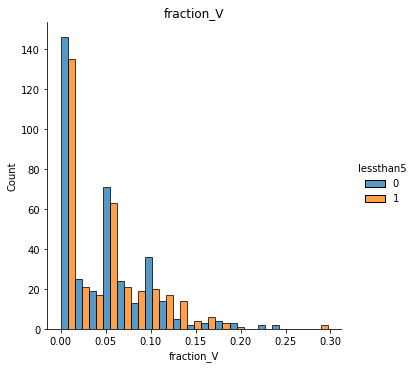

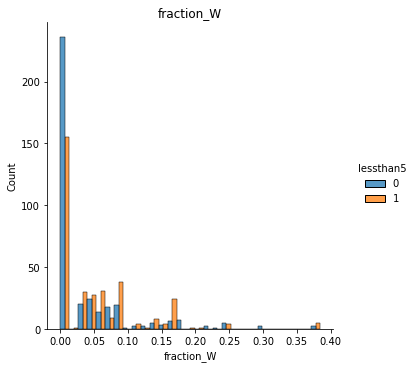

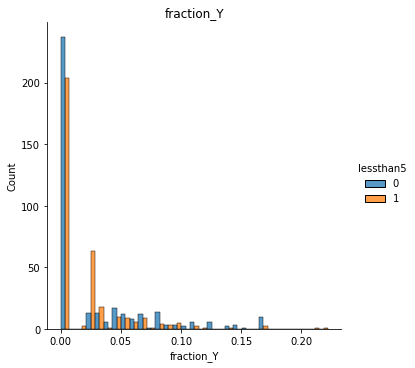

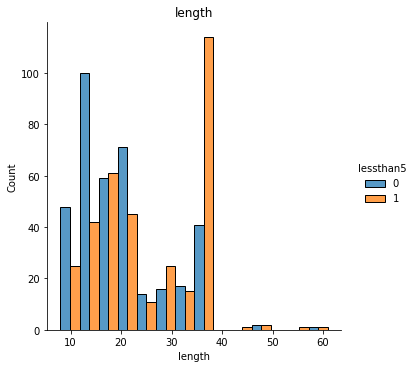

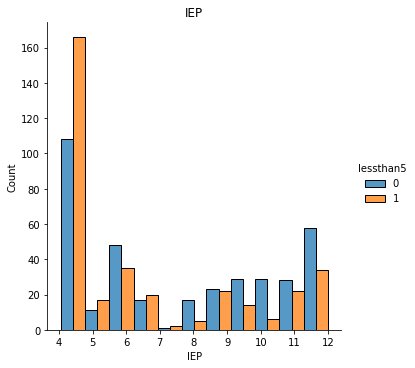

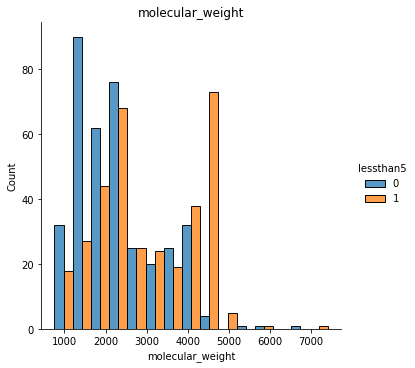

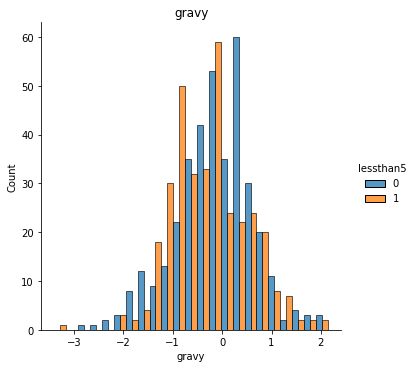

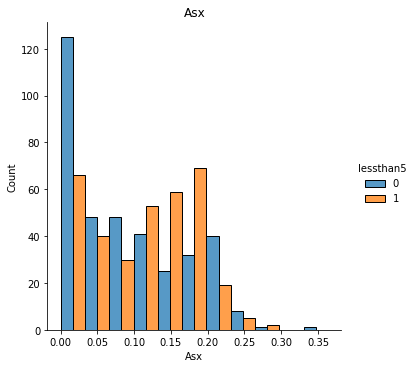

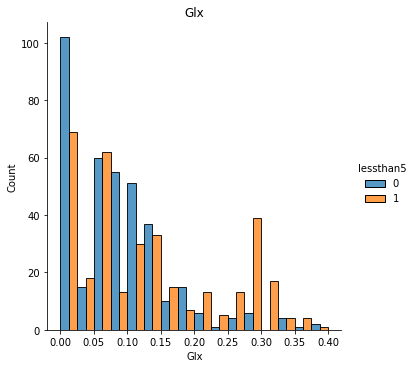

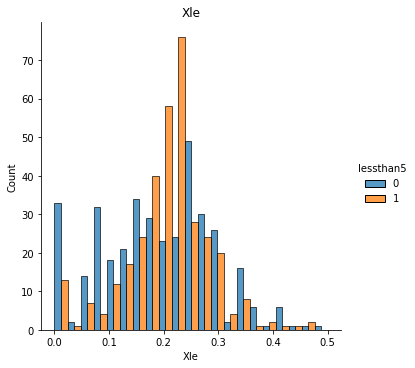

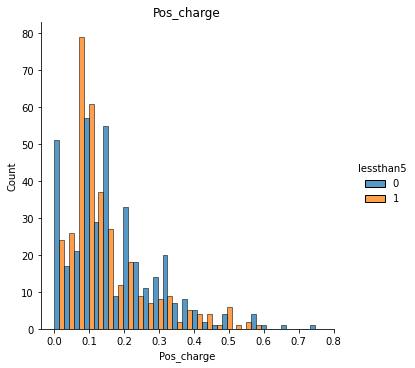

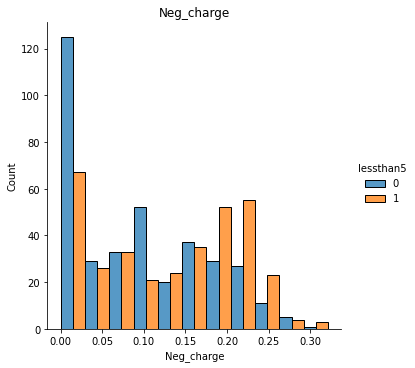

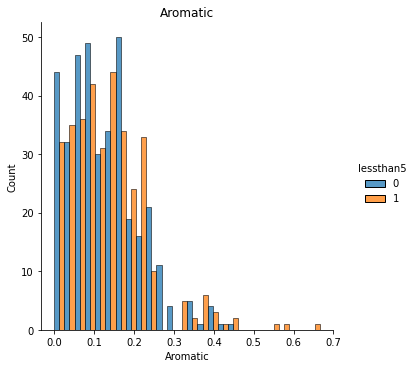

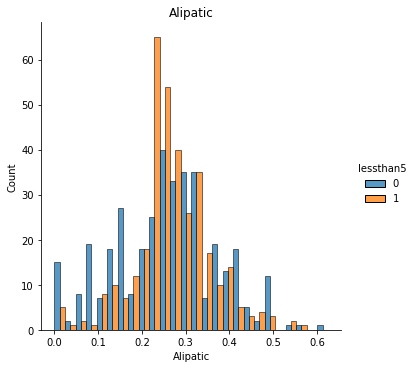

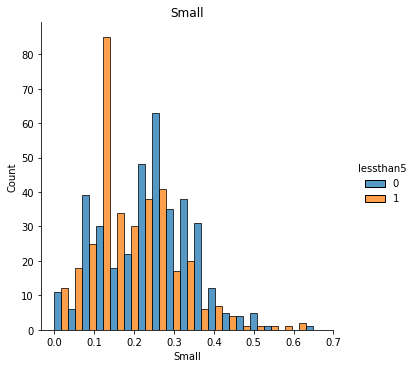

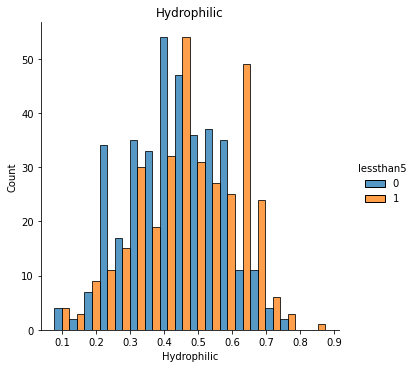

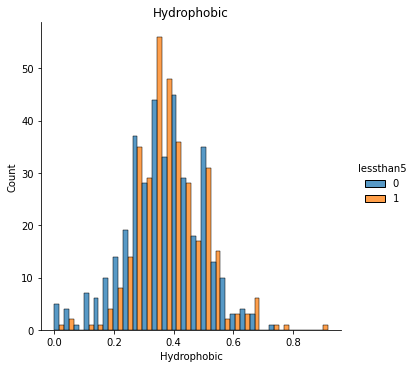

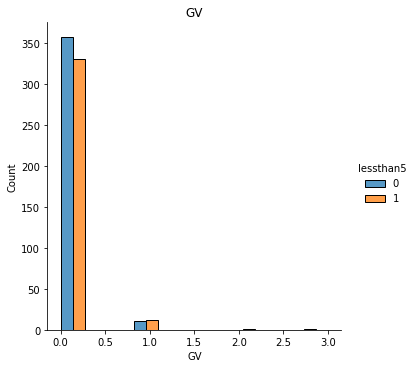

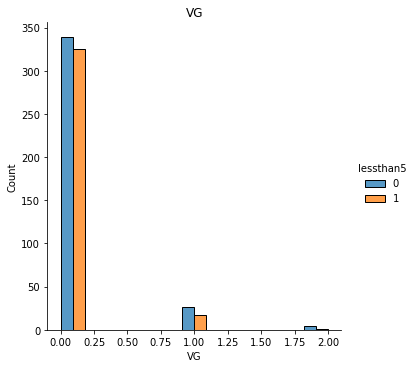

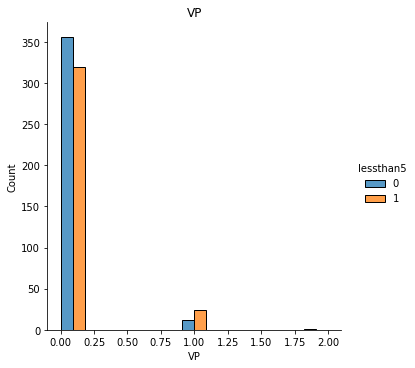

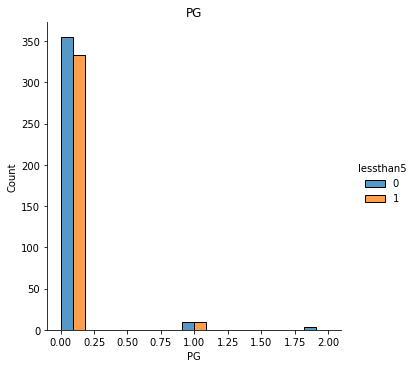

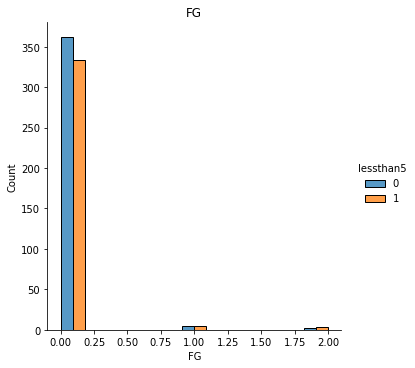

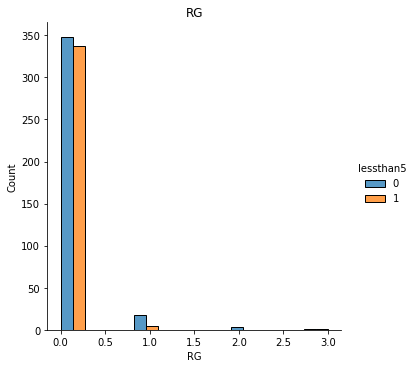

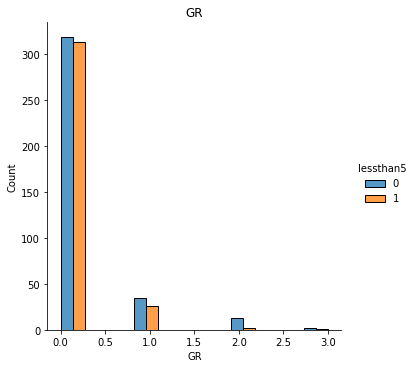

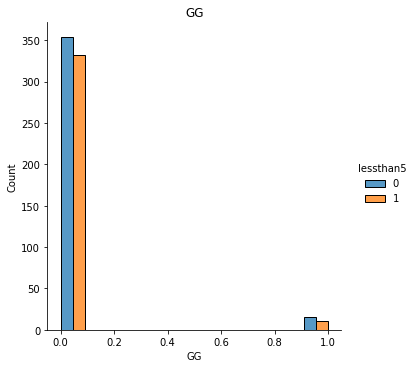

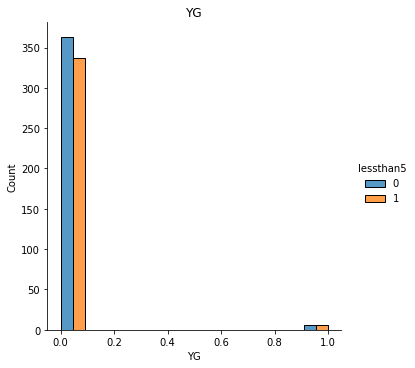

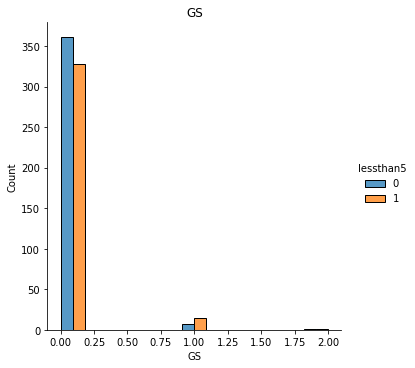

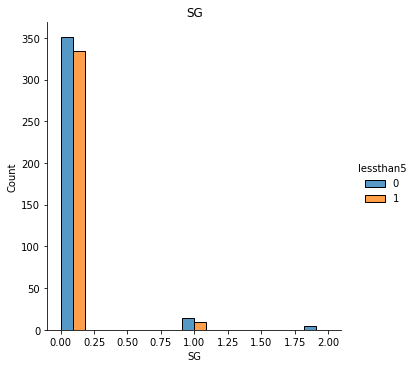

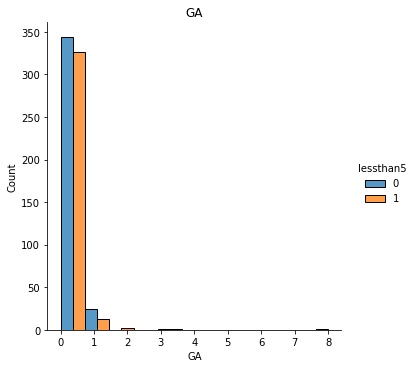

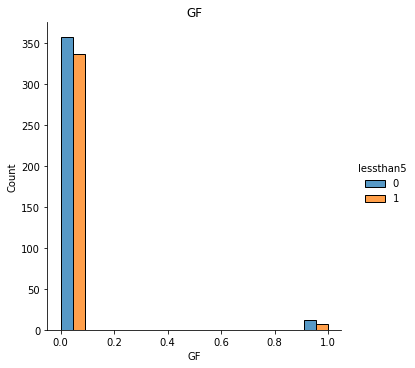

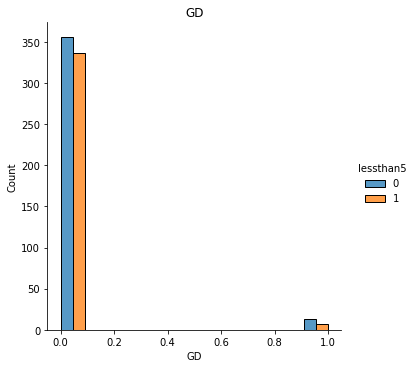

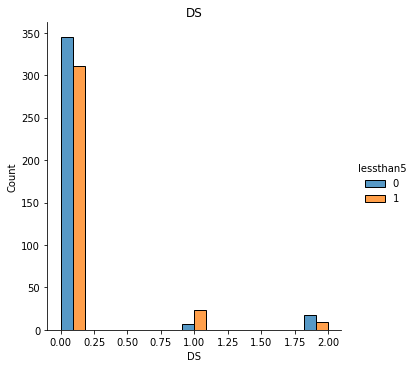

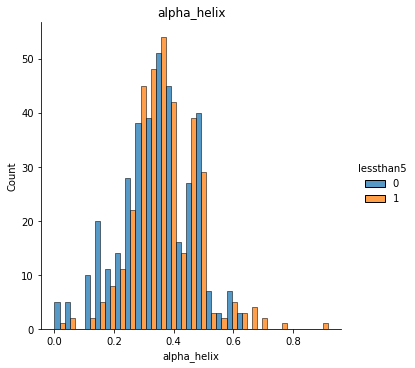

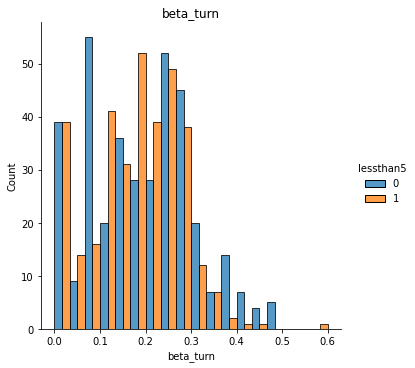

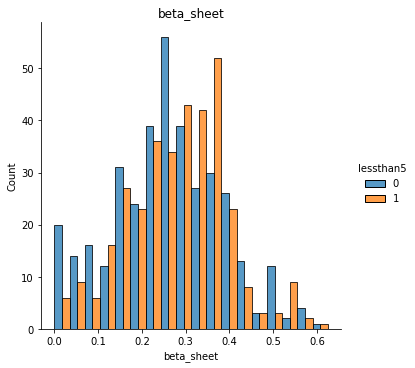

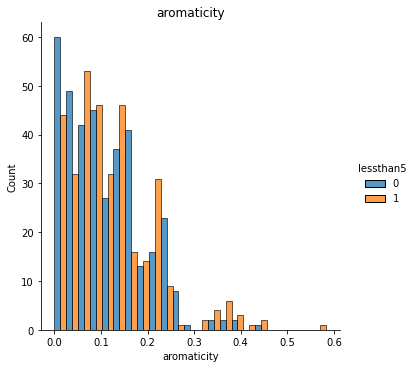

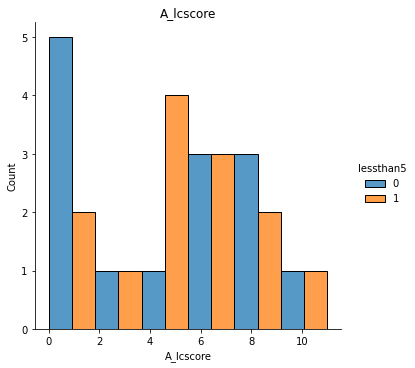

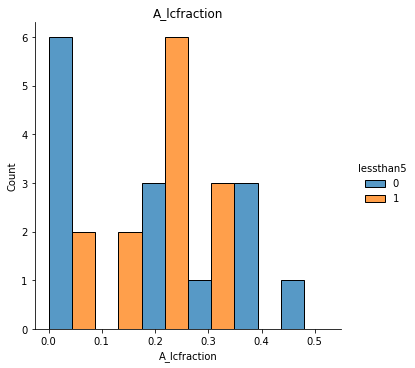

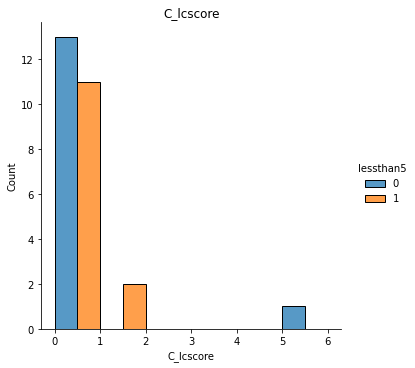

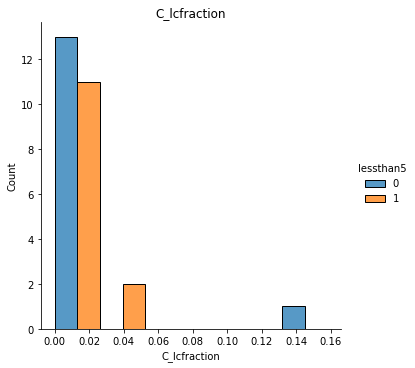

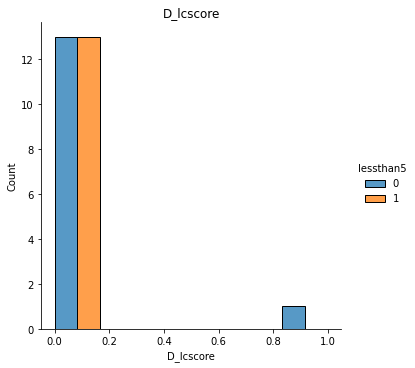

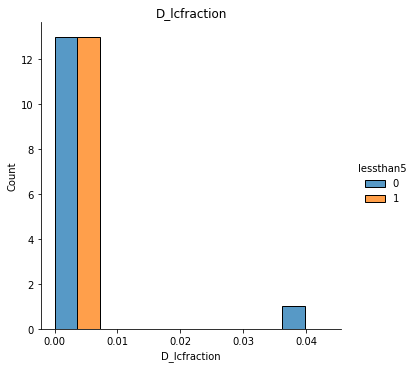

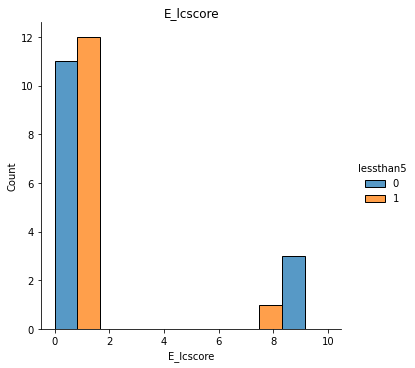

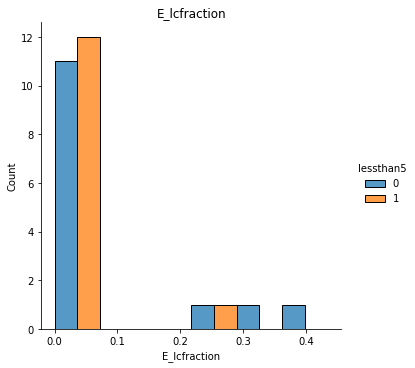

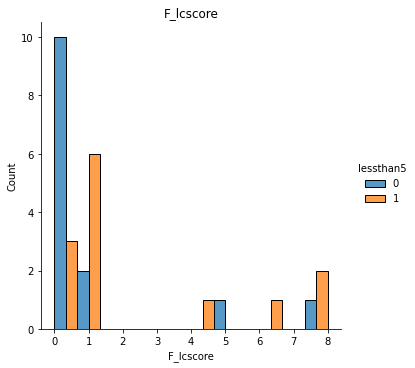

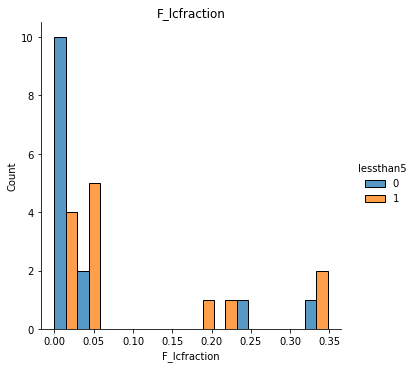

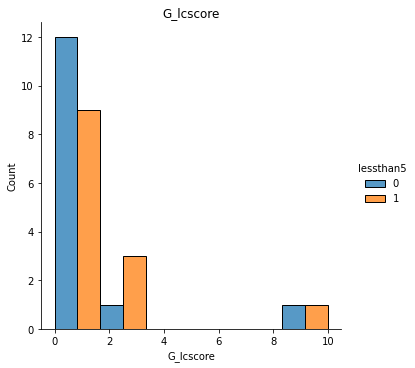

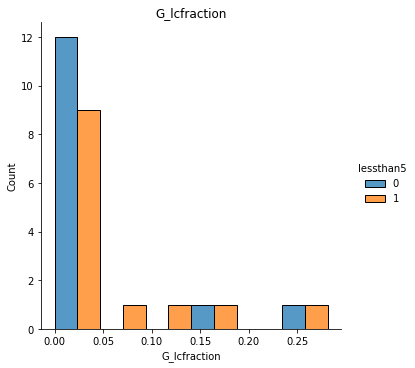

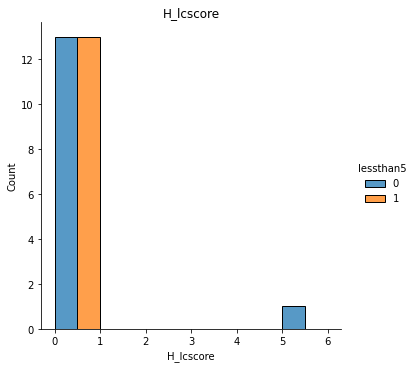

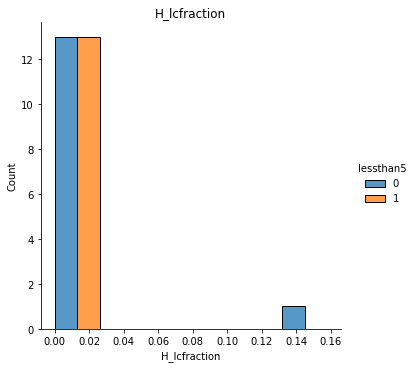

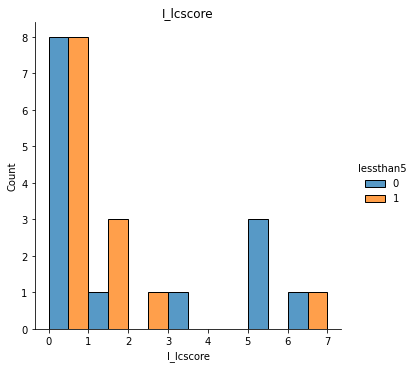

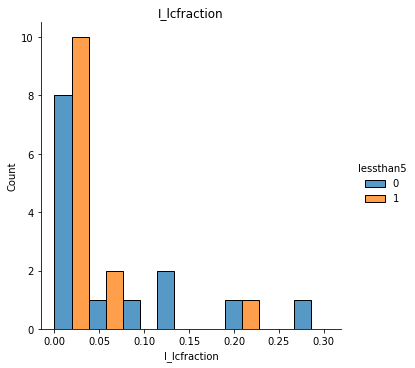

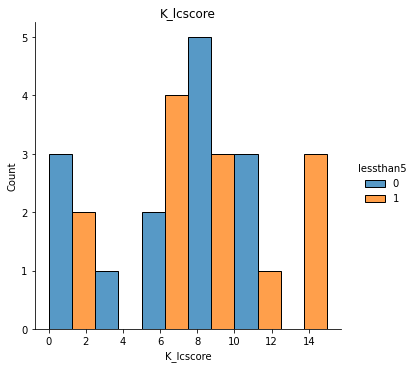

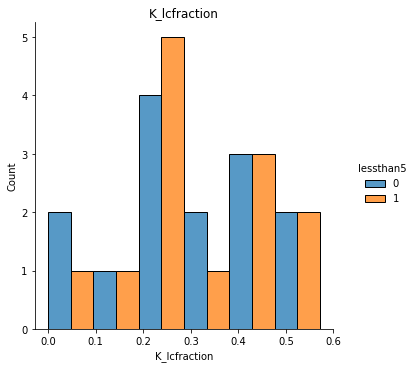

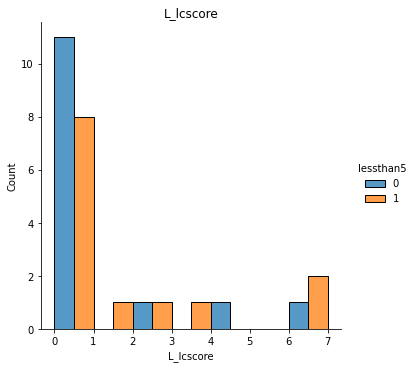

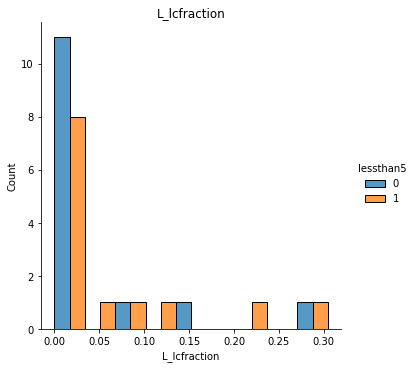

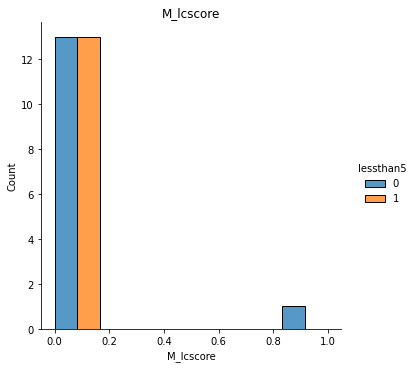

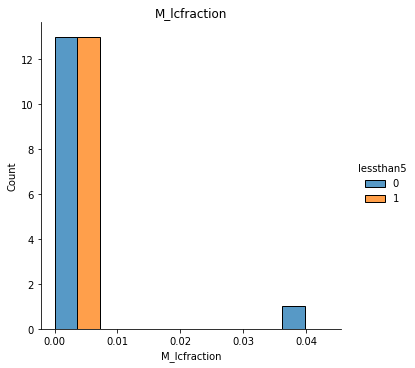

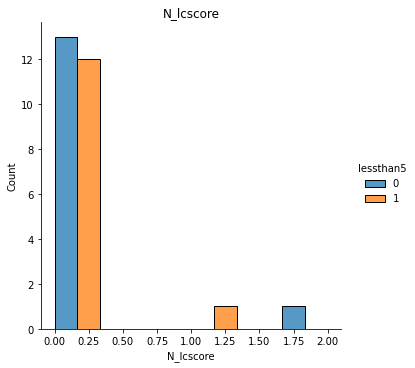

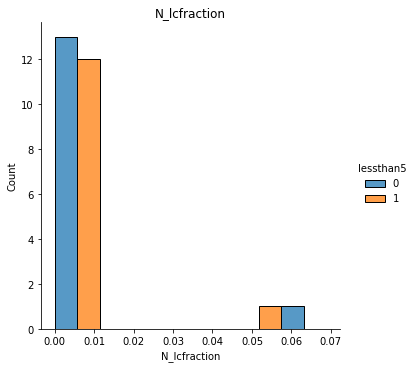

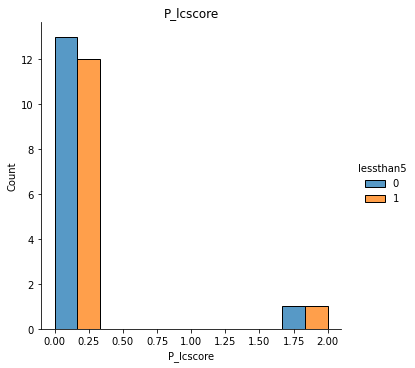

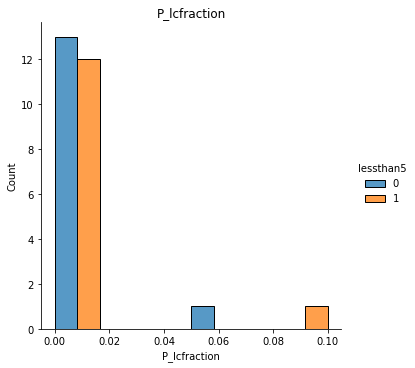

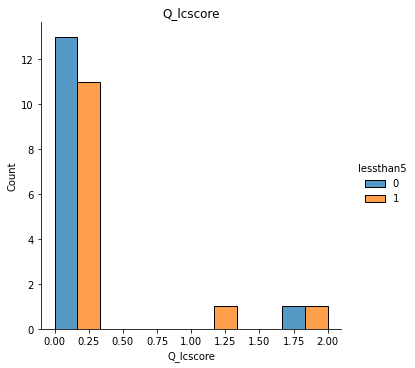

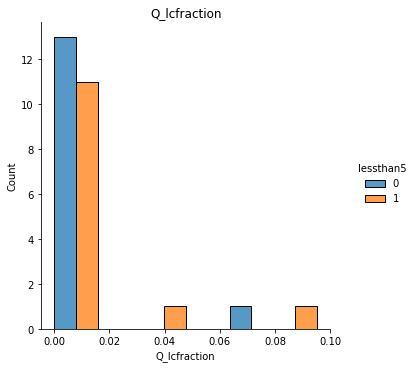

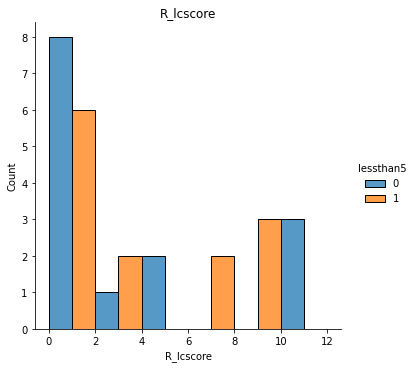

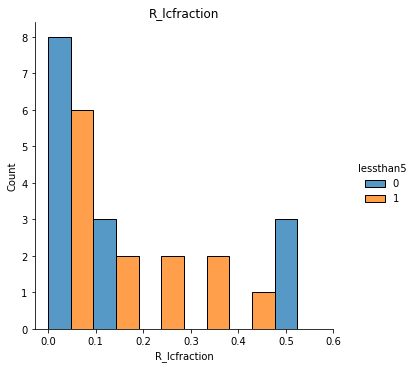

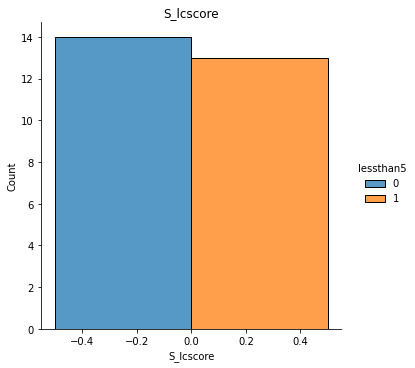

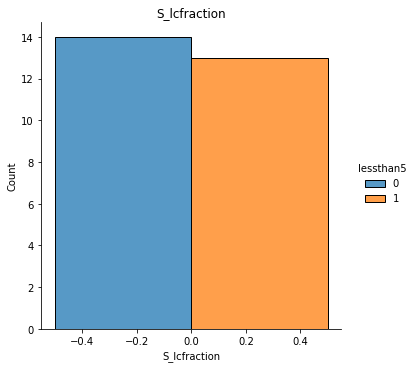

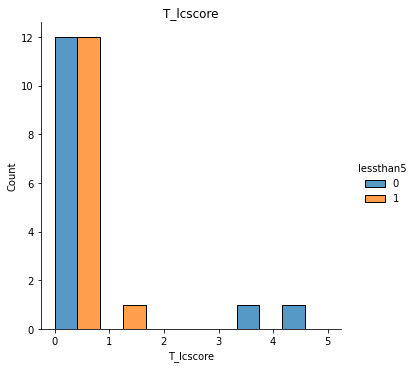

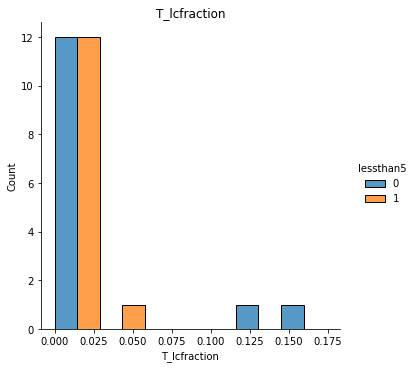

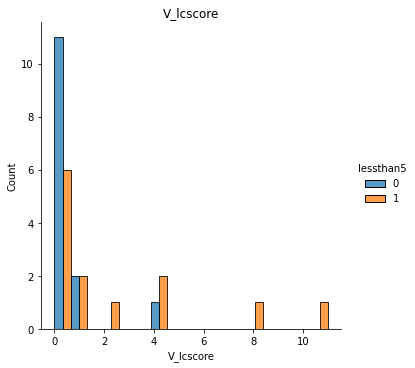

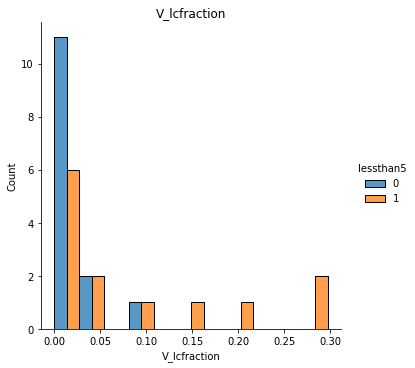

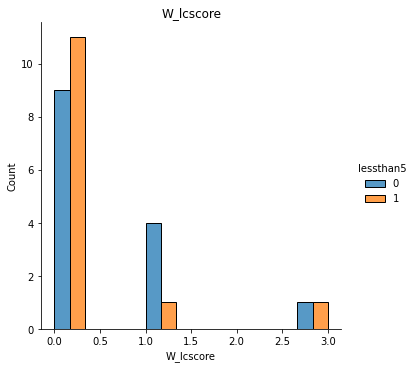

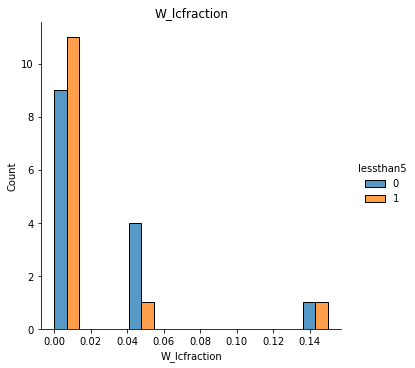

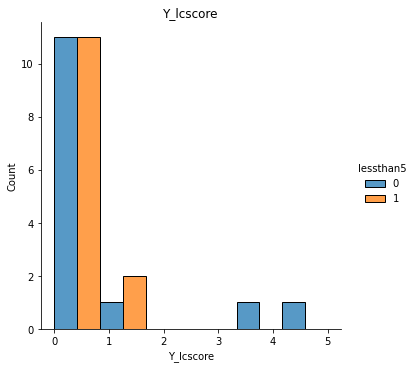

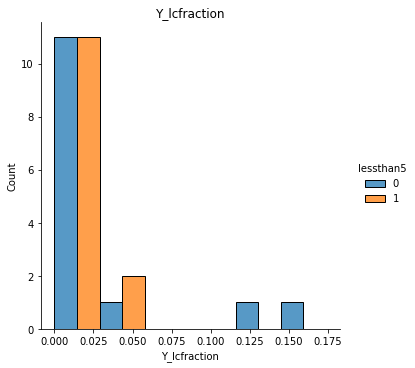

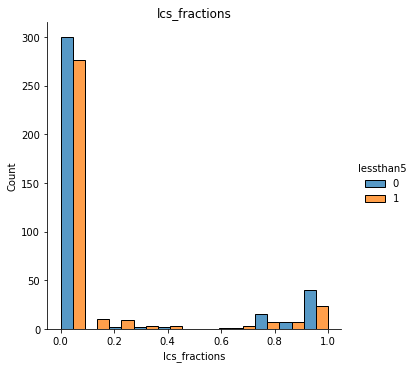

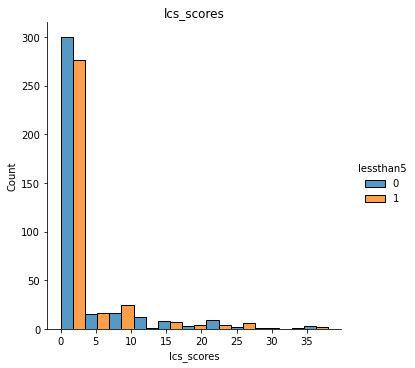

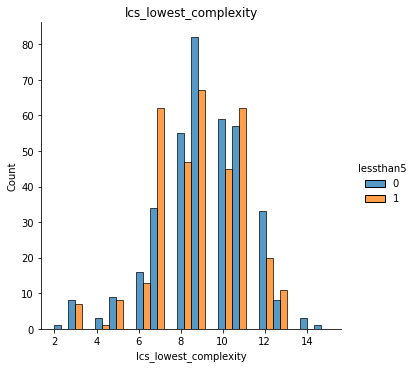

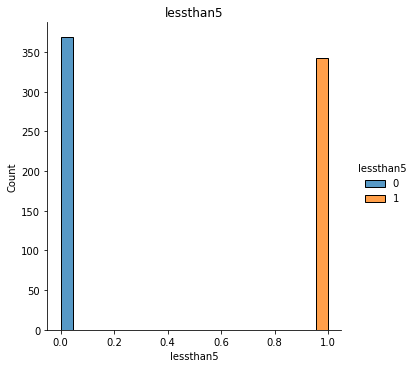

In [21]:
for feature in prop_cols:
    sns.displot(x=df[feature], hue=df['lessthan5'], multiple="dodge")
    plt.title(feature)
    plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [32]:
['psuedo-amino-acid',
'length',
'molecular_weight',
'Pos_charge',
'Neg_charge',
'Alipatic',
'Hydrophilic']

['psuedo-amino-acid',
 'length',
 'molecular_weight',
 'Pos_charge',
 'Neg_charge',
 'Alipatic',
 'Hydrophilic']

In [30]:
list(prop_cols)

['hpi_<-1.5_frac',
 'hpi_<-2.0_frac',
 'hpi_<-2.5_frac',
 'hpi_<-1.5',
 'hpi_<-2.0',
 'hpi_<-2.5',
 'fraction_A',
 'fraction_C',
 'fraction_D',
 'fraction_E',
 'fraction_F',
 'fraction_G',
 'fraction_H',
 'fraction_I',
 'fraction_K',
 'fraction_L',
 'fraction_M',
 'fraction_N',
 'fraction_P',
 'fraction_Q',
 'fraction_R',
 'fraction_S',
 'fraction_T',
 'fraction_V',
 'fraction_W',
 'fraction_Y',
 'length',
 'IEP',
 'molecular_weight',
 'gravy',
 'Asx',
 'Glx',
 'Xle',
 'Pos_charge',
 'Neg_charge',
 'Aromatic',
 'Alipatic',
 'Small',
 'Hydrophilic',
 'Hydrophobic',
 'GV',
 'VG',
 'VP',
 'PG',
 'FG',
 'RG',
 'GR',
 'GG',
 'YG',
 'GS',
 'SG',
 'GA',
 'GF',
 'GD',
 'DS',
 'alpha_helix',
 'beta_turn',
 'beta_sheet',
 'aromaticity',
 'A_lcscore',
 'A_lcfraction',
 'C_lcscore',
 'C_lcfraction',
 'D_lcscore',
 'D_lcfraction',
 'E_lcscore',
 'E_lcfraction',
 'F_lcscore',
 'F_lcfraction',
 'G_lcscore',
 'G_lcfraction',
 'H_lcscore',
 'H_lcfraction',
 'I_lcscore',
 'I_lcfraction',
 'K_lcscore',
 